# CW2 - Machine/Deep learning algorithms in cryptocurrency trading

### Data set selection and definition of ML objective

**Objectives**:

1. Use machine/deep learning to predict bitcoin closing price in USD(United States Dollar). 

2. Investigate which features are the most important when it comes to making the above prediction. 

**Dataset chosen**:

[Kaggle - Top 100 Cryptocurrencies Historical Dataset](https://www.kaggle.com/datasets/kaushiksuresh147/top-10-cryptocurrencies-historical-dataset/data)

In [116]:
# First lets set the path for Kaggle API
import os

kaggle_dir = os.path.join(os.path.expanduser('~'), '.kaggle')
kaggle_file = os.path.join(kaggle_dir, 'kaggle.json')

# Check if the .kaggle directory exists before creating it
if not os.path.exists(kaggle_dir):
    os.system("mkdir -p " + kaggle_dir)
    print("Created directory " + kaggle_dir)
else:
    print("Directory " + kaggle_dir + " already exists")

# Check if the kaggle.json file exists in the .kaggle directory before moving it
if not os.path.exists(kaggle_file):
    os.system("mv kaggle.json " + kaggle_file)
    os.system("chmod 600 " + kaggle_file)
    print(f"Moved kaggle.json to {kaggle_file} and changed its permissions")
else:
    print("File " + kaggle_file + " already exists, changing its permissions not needed")


# Check if the zip file exists before downloading
if not os.path.exists('top-10-cryptocurrencies-historical-dataset.zip'):
    !kaggle datasets download -d kaushiksuresh147/top-10-cryptocurrencies-historical-dataset
    !unzip top-10-cryptocurrencies-historical-dataset.zip
    print("Downloaded and unzipped top-10-cryptocurrencies-historical-dataset.zip")
else:
    print("File top-10-cryptocurrencies-historical-dataset.zip already exists")


# Clear metrics files before writing new metrics
def clear_file_contents(filenames):
    for filename in filenames:
        if os.path.exists(filename):
            # Open the file in write mode with no content to clear it
            with open(filename, 'w') as file:
                pass  # Opening in 'w' mode and closing the file clears its contents

files_to_check = ["model_test_data_metrics.txt", "price_features_metrics.txt"]
clear_file_contents(files_to_check)

Directory /home/realtime/.kaggle already exists
File /home/realtime/.kaggle/kaggle.json already exists, changing its permissions not needed
File top-10-cryptocurrencies-historical-dataset.zip already exists


# Data preparation and Analysis

In [117]:
# Loading the data into dataframes
import pandas as pd

# List of cryptocurrencies
cryptos = ['bitcoin', 'litecoin', 'ethereum', 'xrp']

# Dictionary to store the dataframes
dfs = {}

# Load each CSV file into a DataFrame and store it in the dictionary
for crypto in cryptos:
    df_name = 'raw_' + crypto + '_pd'
    dfs[df_name] = pd.read_csv(f'Top 100 Crypto Coins/{crypto}.csv')
    print(f"Top 5 rows of {df_name}:")
    print(dfs[df_name].head())
    print("\n")

    print(f"Statistics for {df_name}:")
    print(dfs[df_name].describe())
    print("\n")
    
    print(f"Missing values in {df_name}:")
    print(dfs[df_name].isnull().sum())
    print("\n")


Top 5 rows of raw_bitcoin_pd:
         Date  Open  High  Low  Close  Volume Currency
0  2010-07-18   0.0   0.1  0.1    0.1      75      USD
1  2010-07-19   0.1   0.1  0.1    0.1     574      USD
2  2010-07-20   0.1   0.1  0.1    0.1     262      USD
3  2010-07-21   0.1   0.1  0.1    0.1     575      USD
4  2010-07-22   0.1   0.1  0.1    0.1    2160      USD


Statistics for raw_bitcoin_pd:
               Open          High           Low         Close        Volume
count   4420.000000   4420.000000   4420.000000   4420.000000  4.420000e+03
mean    8302.221855   8531.971380   8043.473869   8306.969457  1.395788e+07
std    14598.398937  14992.605971  14146.499234  14599.046649  1.645973e+08
min        0.000000      0.100000      0.000000      0.100000  0.000000e+00
25%      122.500000    129.975000    118.300000    122.800000  3.013600e+04
50%      683.600000    706.500000    657.550000    685.000000  6.762050e+04
75%     8877.250000   9122.700000   8666.900000   8886.075000  1.769402e+05

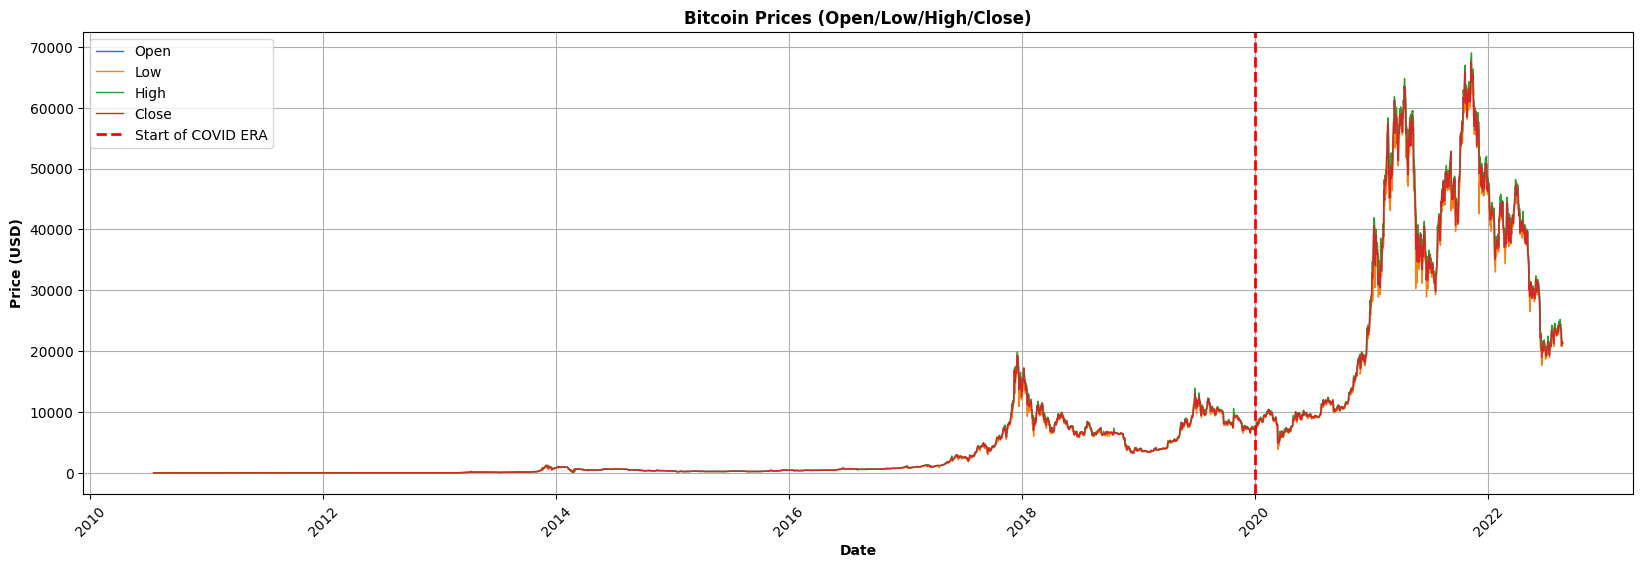

In [118]:
import matplotlib.pyplot as plt

# Assuming dfs['raw_bitcoin_pd'] is your DataFrame
df_bitcoin_1 = dfs['raw_bitcoin_pd'].copy()

# Convert 'Date' column to datetime if it's not already
df_bitcoin_1['Date'] = pd.to_datetime(df_bitcoin_1['Date'])

# Plotting
plt.figure(figsize=(20, 6))

# Plot Open, Low, High, Close prices
plt.plot(df_bitcoin_1['Date'], df_bitcoin_1['Open'], label='Open', linewidth=1)
plt.plot(df_bitcoin_1['Date'], df_bitcoin_1['Low'], label='Low', linewidth=1)
plt.plot(df_bitcoin_1['Date'], df_bitcoin_1['High'], label='High', linewidth=1)
plt.plot(df_bitcoin_1['Date'], df_bitcoin_1['Close'], label='Close', linewidth=1)

# Highlighting the "COVID ERA" starting from 2020
plt.axvline(pd.Timestamp('2020-01-01'), color='r', linestyle='--', linewidth=2, label='Start of COVID ERA')

# Adding legend
plt.legend()

# Adding grid
plt.grid(True)

# Set the title and axis labels
plt.title('Bitcoin Prices (Open/Low/High/Close)', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Price (USD)', fontweight='bold')

# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/lib/python3/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/lib/python3/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

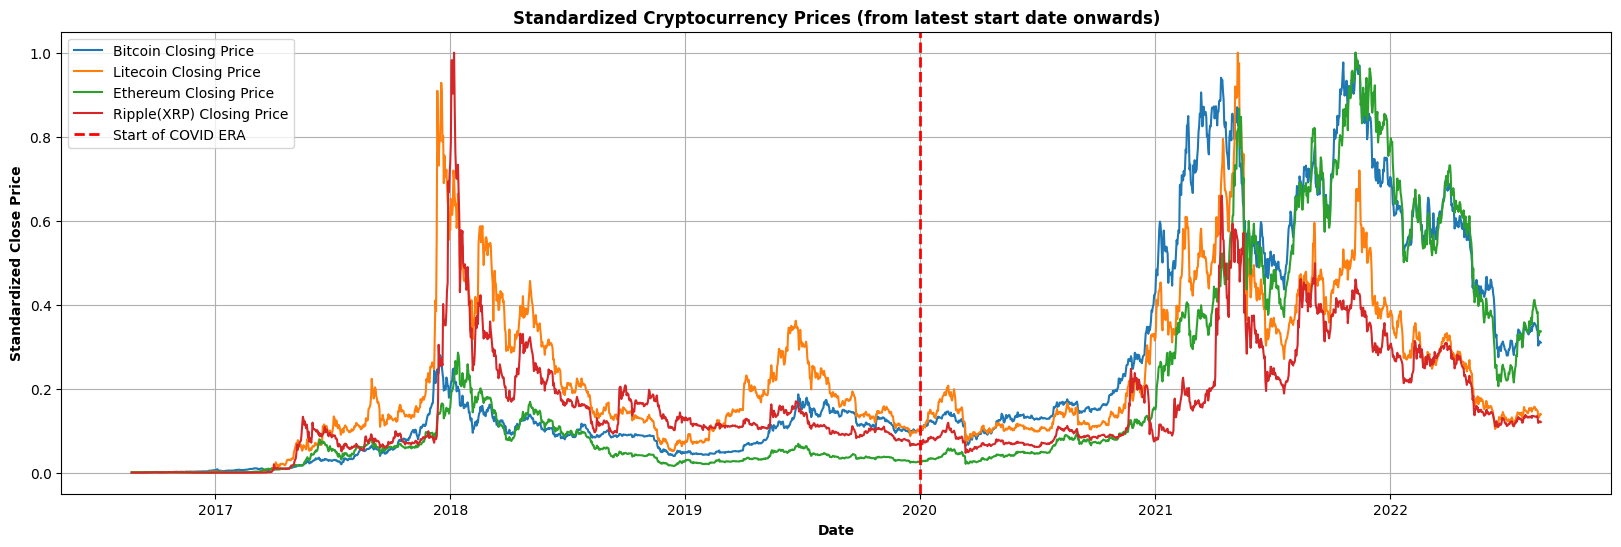

In [119]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dfs_copied = dfs.copy()
scaler = MinMaxScaler()

# Convert 'Date' to datetime and set it as index
for df_name, df in dfs_copied.items():
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Find the latest starting date among all the cryptocurrencies
latest_start_date = max(df.index.min() for df in dfs_copied.values())

label_names = {}
label_names['raw_bitcoin_pd']  = 'Bitcoin Closing Price'
label_names['raw_litecoin_pd'] = 'Litecoin Closing Price'
label_names['raw_ethereum_pd'] = 'Ethereum Closing Price'
label_names['raw_xrp_pd']      = 'Ripple(XRP) Closing Price'   

# Plot each cryptocurrency's closing price
plt.figure(figsize=(20, 6))
for df_name, df in dfs_copied.items():
    df = df.loc[df.index >= latest_start_date]  # Filter data from the latest start date onwards
    df.loc[:, 'Close'] = scaler.fit_transform(df[['Close']])  # Standardize 'Close' price
    plt.plot(df.index, df['Close'], label=label_names[df_name])

# Adding a vertical line to mark the start of the "COVID ERA"
plt.axvline(pd.Timestamp('2020-01-01'), color='r', linestyle='--', linewidth=2, label='Start of COVID ERA')

plt.title('Standardized Cryptocurrency Prices (from latest start date onwards)', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Standardized Close Price', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

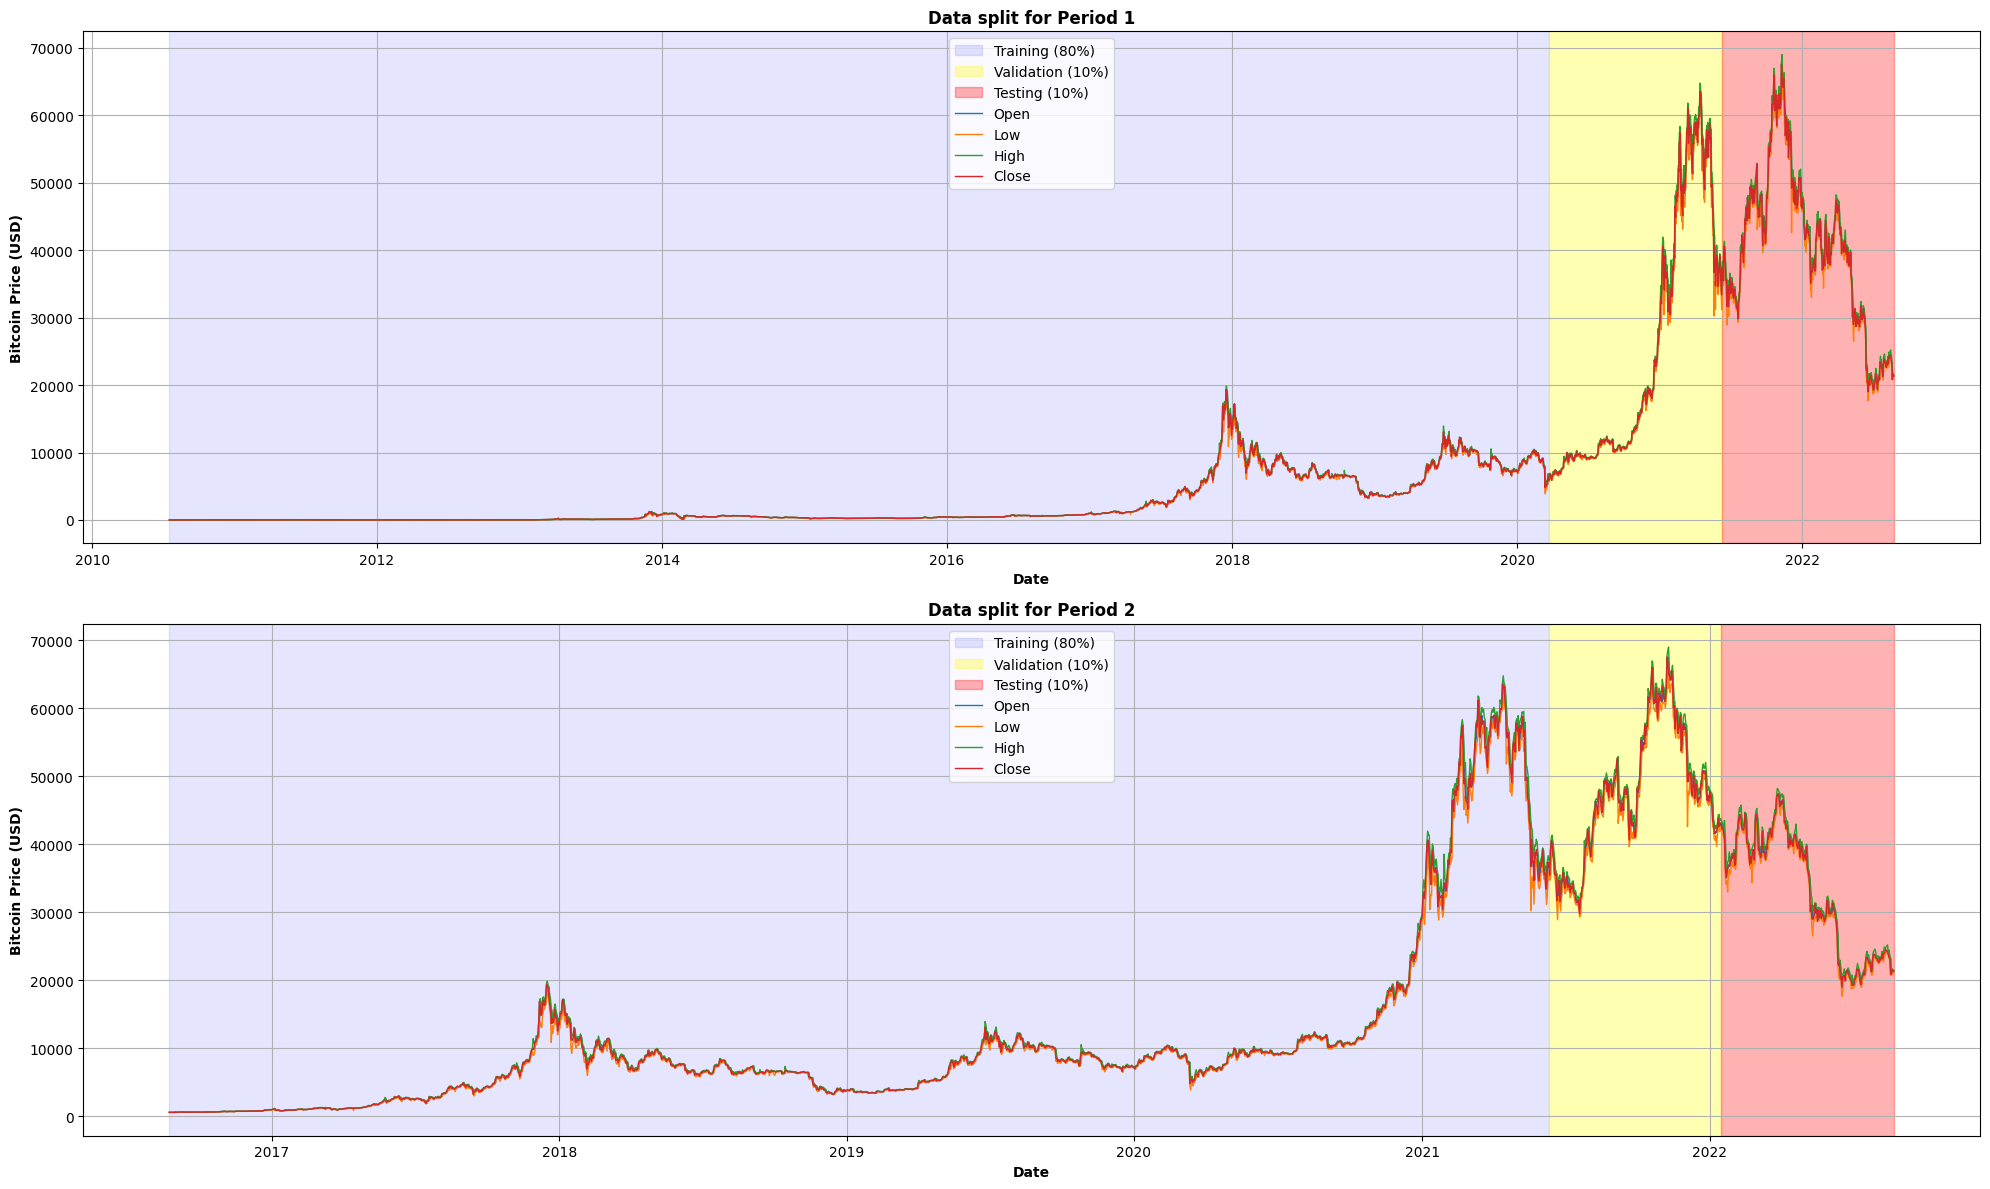

In [120]:
# Function to highlight splits
def highlight_splits(ax, df, title):
    total_rows = len(df)
    train_end = int(total_rows * 0.8)
    val_end = train_end + int(total_rows * 0.1)

    # Highlight training, validation, testing regions
    ax.axvspan(df['Date'].iloc[0], df['Date'].iloc[train_end], color='blue', alpha=0.1, label='Training (80%)')
    ax.axvspan(df['Date'].iloc[train_end], df['Date'].iloc[val_end], color='yellow', alpha=0.3, label='Validation (10%)')
    ax.axvspan(df['Date'].iloc[val_end], df['Date'].iloc[-1], color='red', alpha=0.3, label='Testing (10%)')

    # Plot Open, Low, High, Close prices
    ax.plot(df['Date'], df['Open'], label='Open', linewidth=1)
    ax.plot(df['Date'], df['Low'], label='Low', linewidth=1)
    ax.plot(df['Date'], df['High'], label='High', linewidth=1)
    ax.plot(df['Date'], df['Close'], label='Close', linewidth=1)

    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Date', fontweight='bold')
    ax.set_ylabel('Bitcoin Price (USD)', fontweight='bold')
    ax.legend()
    ax.grid(True)

# Prepare subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))

# Plot for Period 1 (Entire Dataset)
highlight_splits(ax1, df_bitcoin_1, "Data split for Period 1")

# Prepare data for Period 2 (Last 2191 rows)
df_bitcoin_2 = df_bitcoin_1.iloc[-2191:].reset_index(drop=True)

# Plot for Period 2
highlight_splits(ax2, df_bitcoin_2, "Data split for Period 2")

plt.tight_layout()
plt.show()

#### Feature engineering and feature selection

1. Here we add important features such as simple moving average, exponential moving average, moving average convergence divergence, signal line and a few other important financial metrics.
2. We use correrlation matrix and decision tree algorithm to investigate feature importance. 

            Open  High  Low  Close  Volume Currency  SMA_50  SMA_200  \
Date                                                                   
2011-02-02   0.7   0.8  0.7    0.7    5627      USD   0.336   0.1945   
2011-02-03   0.7   0.8  0.7    0.7    8525      USD   0.346   0.1975   
2011-02-04   0.7   0.9  0.7    0.8   42222      USD   0.356   0.2010   
2011-02-05   0.8   0.9  0.8    0.9   15787      USD   0.370   0.2050   
2011-02-06   0.9   0.9  0.8    0.9    8744      USD   0.384   0.2090   
2011-02-07   0.9   0.9  0.8    0.9    2264      USD   0.398   0.2130   

              EMA_50   EMA_200      MACD  Signal_Line    RSI  Daily_Return  \
Date                                                                         
2011-02-02  0.362980  0.231407  0.074939     0.045136  100.0      0.000000   
2011-02-03  0.376197  0.236069  0.085494     0.053207  100.0      0.000000   
2011-02-04  0.392816  0.241681  0.100766     0.062719  100.0      0.142857   
2011-02-05  0.412706  0.248231  0

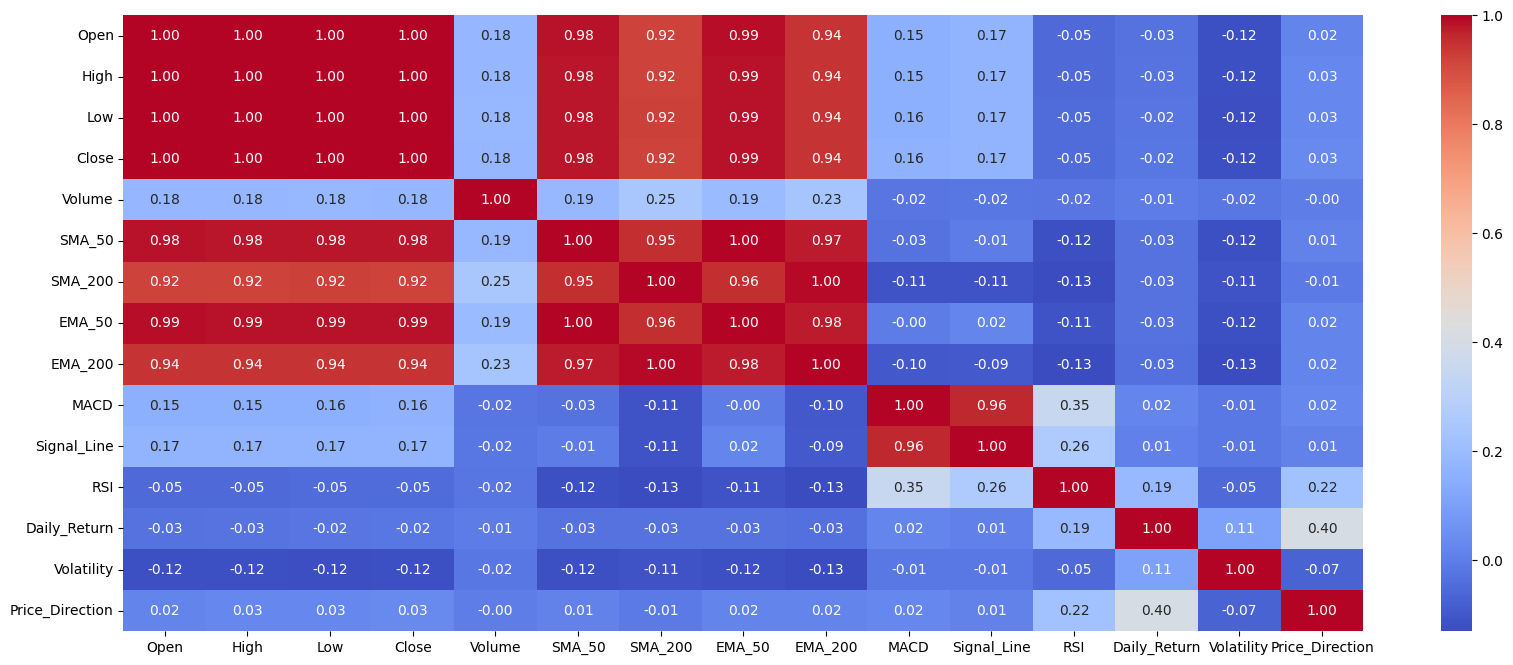

                    Close
Close            1.000000
High             0.999556
Low              0.999468
Open             0.998996
EMA_50           0.985747
SMA_50           0.981267
EMA_200          0.943088
SMA_200          0.919309
Volume           0.182242
Signal_Line      0.169732
MACD             0.156964
Price_Direction  0.033989
Daily_Return    -0.019557
RSI             -0.048863
Volatility      -0.120992


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# We need to add more features to the model to improve its accuracy
# Assuming dfs['raw_bitcoin_pd'] is your DataFrame for Bitcoin
df_bitcoin_2 = dfs['raw_bitcoin_pd'].copy()

# Calculate Moving Averages
df_bitcoin_2['SMA_50']  = df_bitcoin_2['Close'].rolling(window=50).mean()
df_bitcoin_2['SMA_200'] = df_bitcoin_2['Close'].rolling(window=200).mean()

# Calculate Exponential Moving Averages
df_bitcoin_2['EMA_50'] = df_bitcoin_2['Close'].ewm(span=50, adjust=False).mean()
df_bitcoin_2['EMA_200'] = df_bitcoin_2['Close'].ewm(span=200, adjust=False).mean()

# Calculate MACD
# MACD Line = 12-day EMA - 26-day EMA
# Signal Line = 9-day EMA of MACD Line
# MACD Histogram = MACD Line - Signal Line
EMA_12 = df_bitcoin_2['Close'].ewm(span=12, adjust=False).mean()
EMA_26 = df_bitcoin_2['Close'].ewm(span=26, adjust=False).mean()
df_bitcoin_2['MACD'] = EMA_12 - EMA_26
df_bitcoin_2['Signal_Line']    = df_bitcoin_2['MACD'].ewm(span=9, adjust=False).mean()

# Calculate RSI
delta = df_bitcoin_2['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
df_bitcoin_2['RSI'] = 100 - (100 / (1 + RS))

# Calculate Volatility (as the standard deviation of daily returns)
df_bitcoin_2['Daily_Return'] = df_bitcoin_2['Close'].pct_change()
df_bitcoin_2['Volatility']   = df_bitcoin_2['Close'].pct_change().rolling(window=50).std() * np.sqrt(50)

# If today's close is higher than yesterday's close, price direction is 1 (up), otherwise 0 (down or unchanged)
df_bitcoin_2['Price_Direction'] = (df_bitcoin_2['Close'] > df_bitcoin_2['Close'].shift(1)).astype(int)

# Display the head of the DataFrame to verify the new columns
print(df_bitcoin_2.iloc[199:205])


# Calculate the correlation matrix
correlation_matrix = df_bitcoin_2.corr()

# Focus on the 'High' and 'Low' columns
correlation_with_target = correlation_matrix[['Close']].sort_values(by='Close', ascending=False)
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
# Print the correlation values
print(correlation_with_target)

In [122]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

def feature_importance_verifier(df, feature):
    # Ensure specified columns exist in the DataFrame, then drop them if they do
    y = df[feature]  # Target variable
    columns_to_drop = ['Date', 'Currency', 'Close', feature]
    X = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

    # Initialize the random forest
    xgb = XGBRegressor(n_estimators=100, random_state=42)

    # Initialize TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)

    # Perform cross-validation
    cv_scores = cross_val_score(xgb, X, y, cv=tscv, scoring='neg_mean_squared_error')

    # Print cross-validation scores
    print(f"Cross-validation scores (MSE): {-cv_scores}")
    print(f"Mean cross-validation score (MSE): {-cv_scores.mean()}")

    # Fit the model to the data
    xgb.fit(X, y)

    # Extract feature importance
    importances = xgb.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print(f"Feature ranking for {feature}:")
    for f in range(X.shape[1]):
        print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")
  

In [123]:
# We know our data has NaN values, so we need to clean it before training the models
initial_row_count = len(df_bitcoin_2)
df_bitcoin_2_clean = df_bitcoin_2.dropna()
rows_removed = initial_row_count - len(df_bitcoin_2_clean)
feature_importance_verifier(df_bitcoin_2_clean.copy(), 'Close')
print(f"Number of rows removed: {rows_removed}")

Cross-validation scores (MSE): [1.93950799e+05 1.50460713e+02 3.58391791e+07 7.59625990e+04
 6.91743586e+08]
Mean cross-validation score (MSE): 145570565.78002688
Feature ranking for Close:
1. feature Low (0.7557322382926941)
2. feature High (0.2399614006280899)
3. feature Open (0.0038125766441226006)
4. feature Daily_Return (0.0001877458271337673)
5. feature SMA_50 (8.049754978856072e-05)
6. feature RSI (3.808031033258885e-05)
7. feature EMA_50 (3.686710988404229e-05)
8. feature Volatility (3.4820484870579094e-05)
9. feature SMA_200 (3.2147068850463256e-05)
10. feature MACD (2.371896516706329e-05)
11. feature EMA_200 (2.3634534954908304e-05)
12. feature Volume (1.992719444388058e-05)
13. feature Signal_Line (1.6315765606123023e-05)
14. feature Price_Direction (0.0)
Number of rows removed: 203


In [124]:
import numpy as np
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.dates as mdates


def plot_loss(history, title):
    """
    Plots the training loss and validation loss against the number of epochs.

    Parameters:
    - history: The history object returned by the fit method of a Keras model.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_model_predictions(models, X_val_scaled, y_val_scaled, dates_val, scaler_y):
    """
    Plots actual data and predictions from multiple models.
    """
    # Initialize plot
    plt.figure(figsize=(12, 6))
    
    # Plot actual data
    actual = scaler_y.inverse_transform(y_val_scaled)
    plt.scatter(dates_val, actual, label='Actual', color='blue', s=10)  # Use scatter plot for actual data
    plt.plot(dates_val, actual, color='blue', linewidth=1, alpha=0.7)  # Connect actual data points with a line
    
    # Generate and plot predictions for each model
    for i, model in enumerate(models):
        # Generate predictions
        predictions_scaled = model.predict(X_val_scaled)
        predictions = scaler_y.inverse_transform(predictions_scaled)
        
        # Plot predictions with scatter and lines
        plt.scatter(dates_val, predictions, label=f'Model {(i+1)} Predictions', s=10)  # Scatter plot for predictions
        plt.plot(dates_val, predictions, linewidth=1, alpha=0.7)  # Connect prediction dots with a line
    
    # Plot formatting
    plt.title('Actual vs. Predicted Prices(Validation Set)')
    plt.xlabel('Date')
    plt.ylabel('Price(USD)')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate dates for better visibility
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Adjust interval as needed
    plt.gcf().autofmt_xdate()  # Beautify the x-labels
    plt.tight_layout()
    plt.show()


def extract_model_details(model):
    """
    Extracts details from a keras Sequential model with a specific architecture:
    - Two recurrent layers (potentially bidirectional) each followed by a Dropout layer, and a final Dense layer.
    """
    details = ""
    for layer in model.layers:
        if hasattr(layer, 'layer'):  # Check for bidirectionality
            layer_type = f"Bi{layer.layer.__class__.__name__}"
            units = layer.layer.units
        else:
            layer_type = layer.__class__.__name__
            units = layer.units if 'units' in layer.get_config() else 'N/A'
        
        dropout_rate = 'N/A'
        if 'rate' in layer.get_config():
            dropout_rate = layer.rate
        
        details += f"{layer_type} with units: {units}, Dropout: {dropout_rate}\n"
    
    return details


def plot_predicted_and_features_metrics(actual_close, predicted_close, features, title):
    # Assuming actual_close, predicted_close, and features are numpy arrays

    # Compute Metrics for Predicted Close
    if actual_close.ndim == 2 :
        actual_close = np.squeeze(actual_close)
    if predicted_close.ndim == 2:
        predicted_close = np.squeeze(predicted_close)
    
    rmse  = np.sqrt(mean_squared_error(actual_close, predicted_close))
    mae   = mean_absolute_error(actual_close, predicted_close)
    mape  = np.mean(np.abs((actual_close - predicted_close) / actual_close)) * 100
    smape = 100 * np.mean(2 * np.abs(predicted_close - actual_close) / (np.abs(actual_close) + np.abs(predicted_close)))

    # Metrics for Features
    metrics = {'Low': features[:, 0], 'High': features[:, 1], 'Open': features[:, 2]}
    results = {'Predicted Close': [rmse, mae, mape, smape]}

    for key, feature in metrics.items():
        feature_rmse = np.sqrt(mean_squared_error(feature, actual_close))
        feature_mae = mean_absolute_error(feature, actual_close)
        feature_mape = np.mean(np.abs((actual_close - feature) / actual_close)) * 100
        feature_smape = 100 * np.mean(2 * np.abs(feature - actual_close) / (np.abs(actual_close) + np.abs(feature)))
        results[key] = [feature_rmse, feature_mae, feature_mape, feature_smape]

    labels = list(results.keys())
    rmse_values = [result[0] for result in results.values()]
    mae_values = [result[1] for result in results.values()]
    mape_values = [result[2] for result in results.values()]
    smape_values = [result[3] for result in results.values()]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # RMSE and MAE
    axs[0].bar(x - width/2, rmse_values, width, label='RMSE')
    axs[0].bar(x + width/2, mae_values, width, label='MAE')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(labels)
    axs[0].title.set_text(title)
    axs[0].legend()

    # MAPE and sMAPE
    axs[1].bar(x - width/2, mape_values, width, label='MAPE')
    axs[1].bar(x + width/2, smape_values, width, label='sMAPE')
    axs[1].set_title('MAPE and sMAPE')
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(labels)
    axs[1].legend()

    
    plt.tight_layout()
    plt.show()


def plot_test_predictions(model, X_test_scaled, y_test_scaled, dates_test, scaler_X, scaler_y, title):
    """
    Plots actual test dataset vs predicted results.
    """
    # Generate predictions
    predictions_scaled = model.predict(X_test_scaled)
    predictions        = scaler_y.inverse_transform(predictions_scaled)
    actual             = scaler_y.inverse_transform(y_test_scaled)
    X_test_scaled      = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[2])
    features           = scaler_X.inverse_transform(X_test_scaled)

    # Compute Metrics
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    mae = mean_absolute_error(actual, predictions)
    mape = np.mean(np.abs((actual - predictions) / actual)) * 100
    smape = 100 * np.mean(2 * np.abs(predictions - actual) / (np.abs(actual) + np.abs(predictions)))

    # Save metrics to file
    model_details = extract_model_details(model)
    with open("model_test_data_metrics.txt", "a") as file:
        file.write(model_details)
        file.write(f"RMSE: {rmse}, MAE: {mae}, MAPE: {mape}, sMAPE: {smape}\n\n")

    plot_predicted_and_features_metrics(actual, predictions, features, title)

    plt.figure(figsize=(18, 6))  # Adjust the figure size to better accommodate side-by-side subplots

    # Subplot 1: Actual vs. Predicted Close Prices (Left)
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.plot(dates_test, actual, label='Close (Actual)', color='#1f77b4', linewidth=2)
    plt.plot(dates_test, predictions, label='Close (Predicted)', color='#ff7f0e', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    # Subplot 2: Actual Close vs. Open, Low, High Prices (Right)
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.plot(dates_test, actual, label='Close (Actual)', color='#1f77b4', linewidth=2)
    plt.plot(dates_test, features[:, 2], label='Open', color='#9467bd', linestyle='-', linewidth=2)
    plt.plot(dates_test, features[:, 0], label='Low', color='#2ca02c', linestyle=':', linewidth=2)
    plt.plot(dates_test, features[:, 1], label='High', color='#d62728', linestyle='-.', linewidth=2)
    plt.title('Close Price: Actual vs Open, Low, High')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    plt.tight_layout()
    plt.show()
    

### Hyperparameter tuning

Hyperparameter tuning for the models was done using a seperate python(.py) file, the code below is a sample of the hyperparameter tuning approach. 

In [125]:
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.models import Sequential
from keras_tuner import HyperModel
from keras_tuner.tuners import Hyperband
import json

class GRUHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(GRU(units=hp.Int('units', min_value=32, max_value=512, step=32),
                      return_sequences=True,
                      input_shape=self.input_shape))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(GRU(units=hp.Int('units', min_value=32, max_value=512, step=32)))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(1))
        
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model
    
def find_and_save_hyperparameter(df, features, target, train_percent, val_percent):
    # Prepare the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    X = df[features]
    y = df[[target]]  # Keeping it as DataFrame
    
    # Scale features and target
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)
    
    # Reshape for LSTM [samples, time steps, features]
    X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
    
    # Calculate the number of rows for training and validation
    total_rows = len(df)
    train_end = int(total_rows * train_percent)
    val_end = train_end + int(total_rows * val_percent)
    
    # Split data
    X_train_scaled = X_scaled[:train_end]
    y_train_scaled = y_scaled[:train_end]
    X_val_scaled = X_scaled[train_end:val_end]
    y_val_scaled = y_scaled[train_end:val_end]

    input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

    tuner = Hyperband(
        GRUHyperModel(input_shape),
        objective='val_loss',
        max_epochs=20,
        directory='my_dir',
        project_name='gru_tuning'
    )

    tuner.search(X_train_scaled, y_train_scaled, epochs=10, validation_data=(X_val_scaled, y_val_scaled))

    # Save the tuning results to a file
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    model_metrics = {
        'units': best_hps.get('units'),
        'dropout_1': best_hps.get('dropout_1'),
        'dropout_2': best_hps.get('dropout_2')
    }

    with open('model_hyperparameter_tuning.txt', 'w') as f:
        json.dump(model_metrics, f)
        

In [126]:
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense

def compute_metrics_and_write_to_file(df, target, val_end):
    test_y = df[target][val_end:].values  # Assuming target is defined and df is your DataFrame
    price_features = ['Open', 'Low', 'High']  # Extract price features for comparison
    with open("price_features_metrics.txt", "a") as file:
        for feature in price_features:
            feature_raw = df[feature][val_end:].values
            rmse = np.sqrt(mean_squared_error(test_y, feature_raw))
            mae = mean_absolute_error(test_y, feature_raw)
            mape = np.mean(np.abs((test_y - feature_raw) / test_y)) * 100
            
            # Handling cases where test_y or feature_raw are zero to avoid division by zero error
            nonzero_mask = (test_y + feature_raw) != 0
            smape = 100 * np.mean(2 * np.abs(feature_raw[nonzero_mask] - test_y[nonzero_mask]) / (np.abs(test_y[nonzero_mask]) + np.abs(feature_raw[nonzero_mask])))
            
            file.write(f"'{feature}' feature vs '{target}':\n")
            file.write(f"RMSE: {rmse}, MAE: {mae}, MAPE: {mape}, sMAPE: {smape}\n")

def prepare_data(df, features, target, train_percent, val_percent, write_to_file=False):
    # Prepare the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    if df.index.name != 'Date':
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    X = df[features]
    y = df[[target]]  # Keeping it as DataFrame

    # Calculate the number of rows for training and validation
    total_rows = len(df)
    train_end = int(total_rows * train_percent)
    val_end = train_end + int(total_rows * val_percent)

    if write_to_file:
        compute_metrics_and_write_to_file(df, target, val_end) # write metrics of features against the target to a file

    # Scale features and target
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)
    
    # Reshape for LSTM [samples, time steps, features]
    X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
    
    # Split data
    X_train_scaled = X_scaled[:train_end]
    y_train_scaled = y_scaled[:train_end]
    X_val_scaled = X_scaled[train_end:val_end]
    y_val_scaled = y_scaled[train_end:val_end]

    return X_scaled, y_scaled, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, scaler_X, scaler_y

def complete_workflow_and_plot(df, models, features, target, train_percent, val_percent, epochs=20, batch_size=32):
    """
    This function encapsulates the entire workflow: preparing data, building and training the model,
    and plotting the predictions alongside actual values with dates on the x-axis.
    """
    X_scaled, y_scaled, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, scaler_X, scaler_y = prepare_data(df, 
                                                                                                                features, 
                                                                                                                target, 
                                                                                                                train_percent, 
                                                                                                                val_percent,
                                                                                                                write_to_file=True)
    
    # Calculate the number of rows for training and validation
    total_rows = len(df)
    train_end = int(total_rows * train_percent)
    val_end = train_end + int(total_rows * val_percent)
    
    X_test = X_scaled[val_end:]
    y_test = y_scaled[val_end:]
    dates_test = df.index[val_end:]  # Extract test dates
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    titles = ['Bitcoin close price prediction GRU', 'Bitcoin close price prediction LSTM', 'Bitcoin close price prediction BiGRU']
    for i, model in enumerate(models, start=1):  # start=1 begins counting from 1
        model.compile(optimizer='adam', loss='mean_squared_error') # compile the models first !
        history = model.fit(X_train_scaled, 
                            y_train_scaled, 
                            epochs=epochs, 
                            batch_size=batch_size, 
                            validation_data=(X_val_scaled, y_val_scaled), 
                            verbose=0, 
                            callbacks=[early_stopping])
        
        #plot_loss(history, f"Model {i} Training/Validation Loss")
        plot_test_predictions(model, X_test, y_test, dates_test, scaler_X, scaler_y, titles[i-1])

    # Now plot the predictions alongside the actual validation data
    #plot_model_predictions(models, X_val_scaled, y_val_scaled, dates_val, scaler_y)

# Model Selection and training / Results and analysis

1. We build a basic model using grated recurrent units(GRU), with the hyperparameters obtained using tuning. 
2. We build a long short term memory model(LSTM).
3. We also attempt to improve upon the previous GRU model by using bidirectional GRU model.
4. Features like Open, Low and High are correlated to our prediction target Close. We compare the RMSE/MAE of our model's predicted closing price vs Open/Low/High to see how much better our model is comapared to the features(Open/Low/High).

14/14 [==============================] - 0s 3ms/step


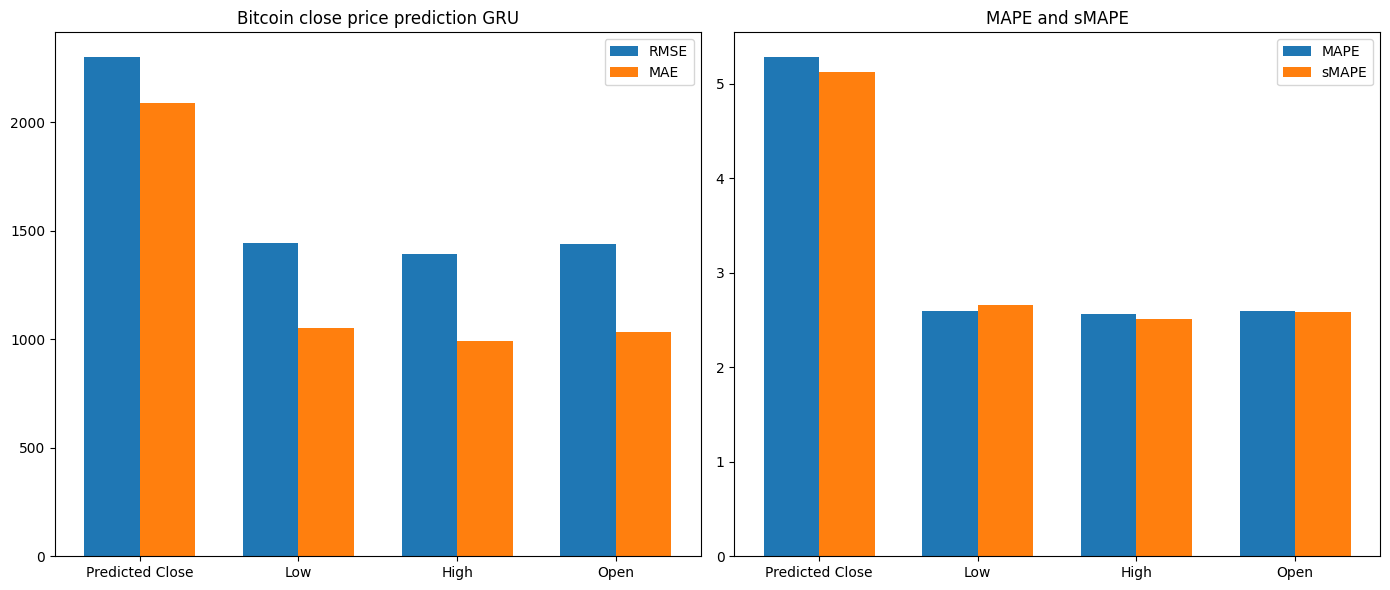

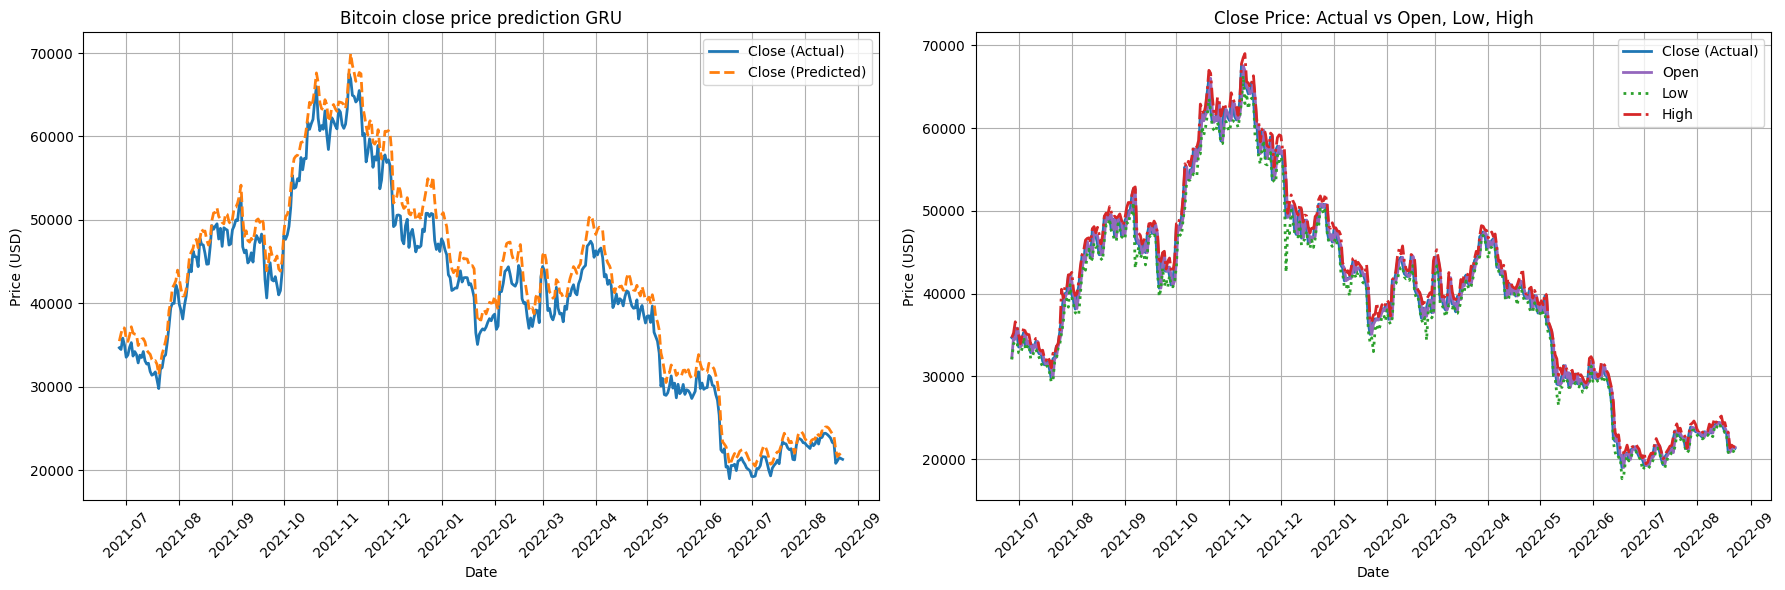

14/14 [==============================] - 0s 3ms/step


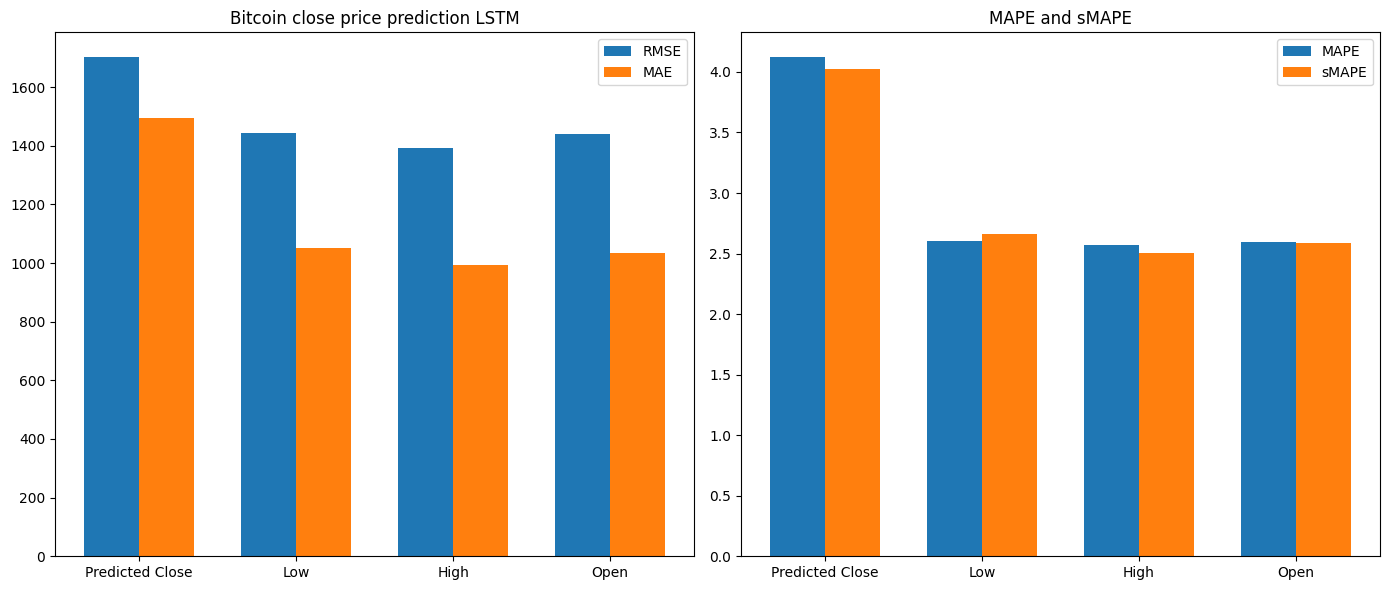

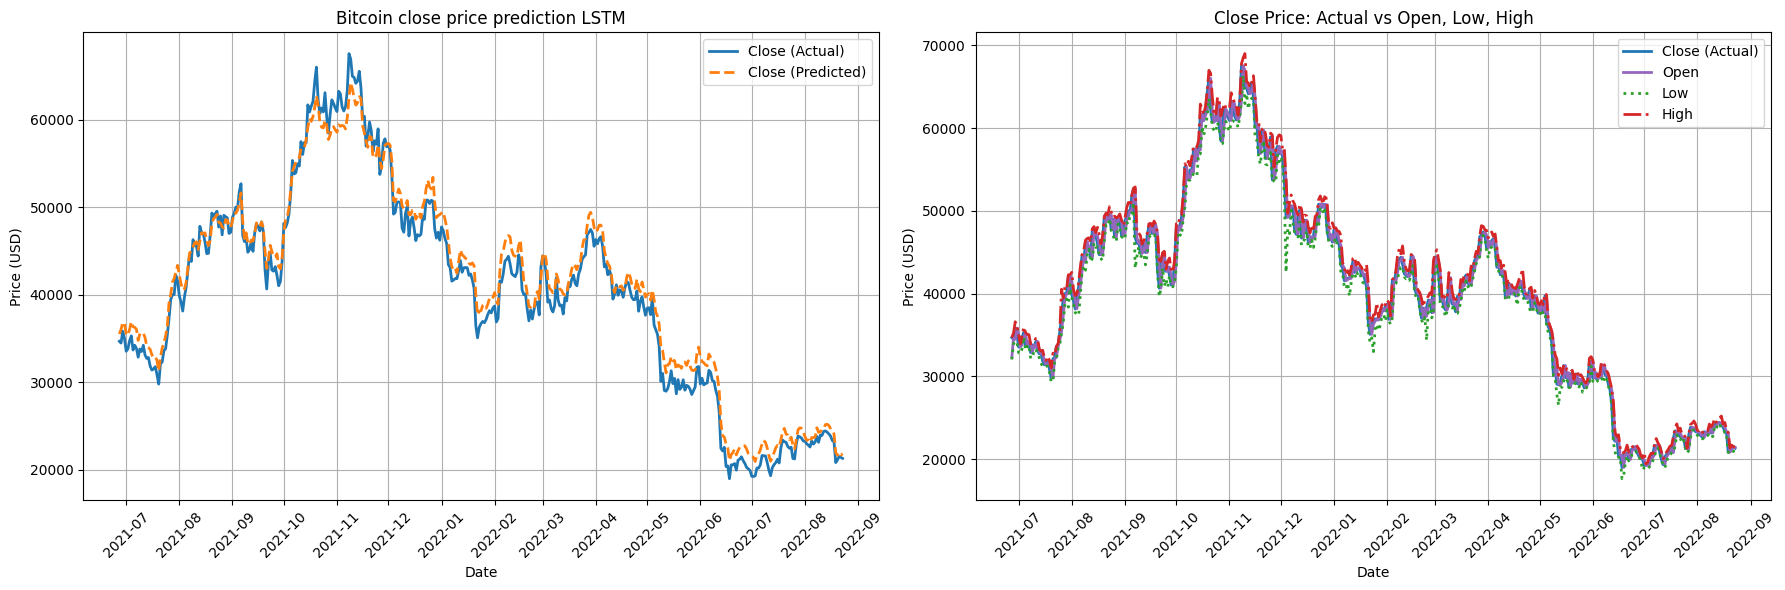

14/14 [==============================] - 1s 3ms/step


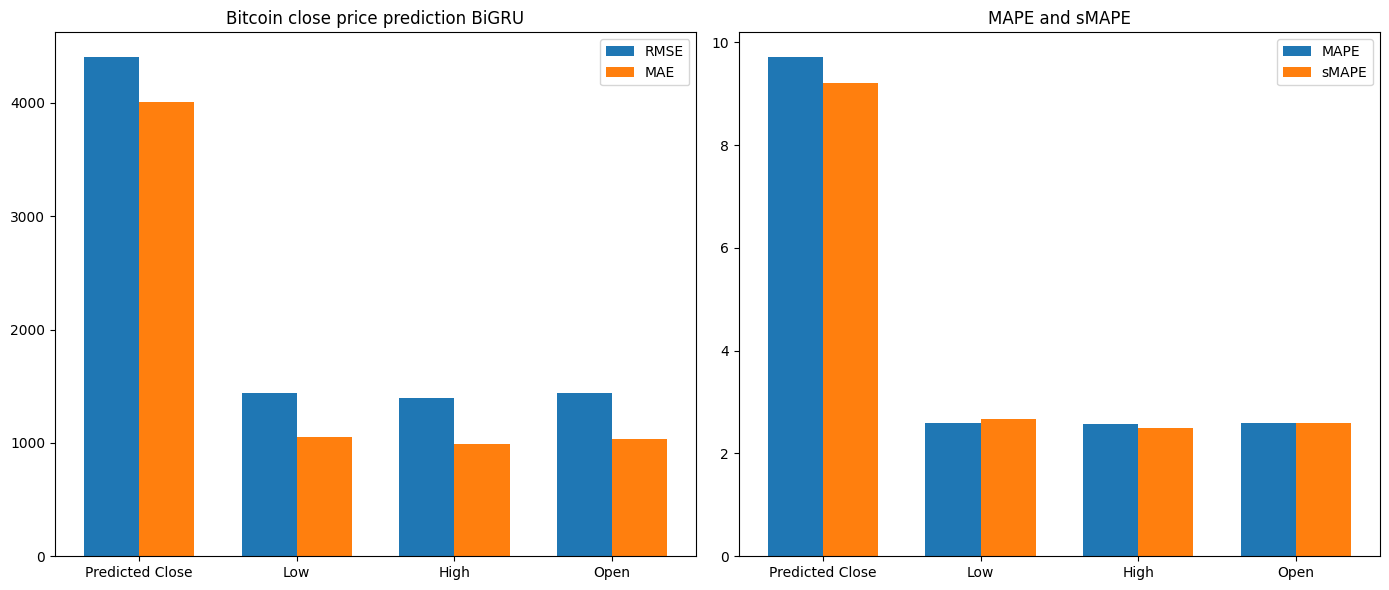

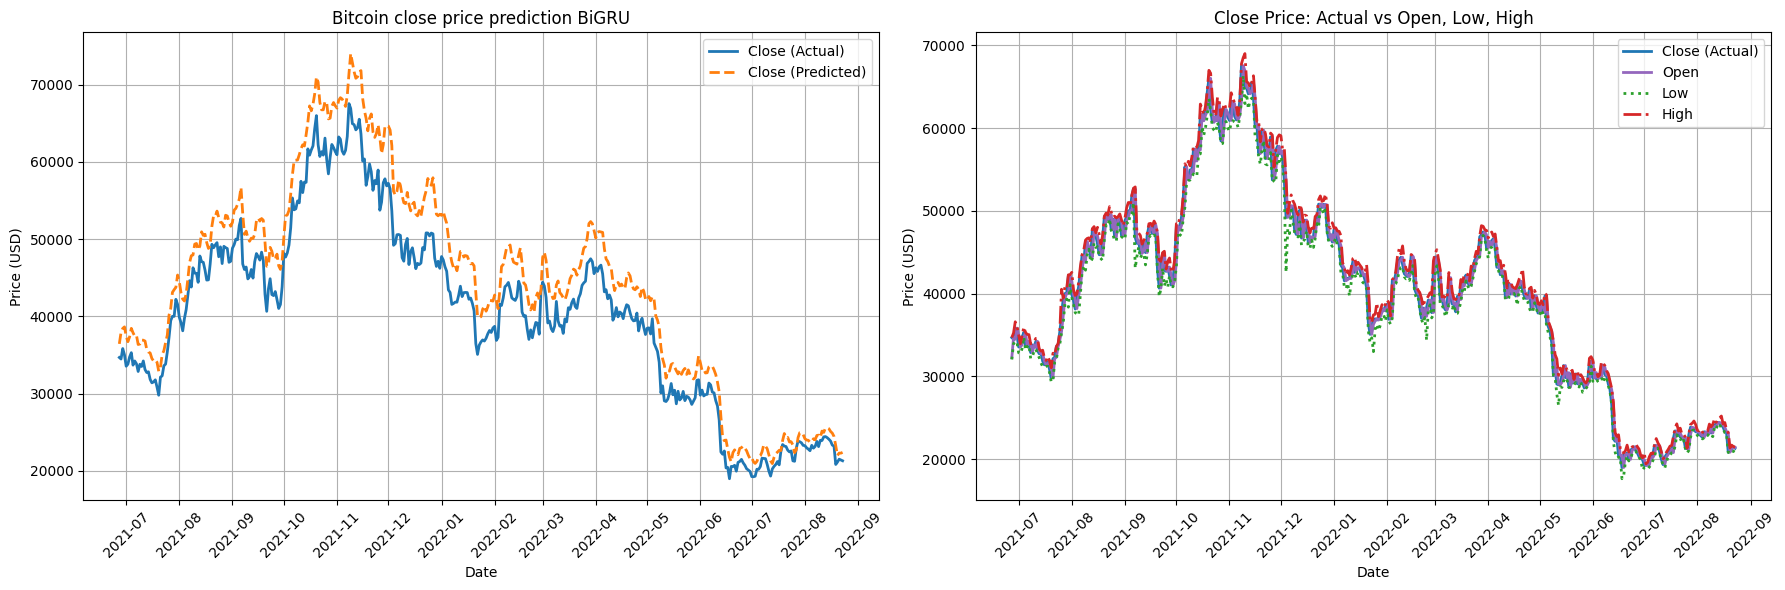

In [127]:
features = ['Low', 'High', 'Open', 'Daily_Return', 'RSI', 'SMA_50']
target   = 'Close'

train_split      = 0.80
validation_split = 0.10

X_scaled, y_scaled, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, scaler_X, scaler_y = prepare_data(df_bitcoin_2_clean.copy(), 
                                                                                                                features, 
                                                                                                                target, 
                                                                                                                train_split, 
                                                                                                                validation_split)

# Build the model 1
model1 = Sequential([
    GRU(416, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.0),
    GRU(512),
    Dropout(0.0),
    Dense(1)
])

# Build the model 2
model2 = Sequential([
    LSTM(448, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.4),
    LSTM(480),
    Dropout(0.0),
    Dense(1)
])

# Build the model 3
model3 = Sequential([
    Bidirectional(GRU(416, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.40),
    Bidirectional(GRU(192)),  # Note: return_sequences defaults to False here
    Dropout(0.40),
    Dense(1)
])

# Train the models then plot their losses
models = [model1, model2, model3]

complete_workflow_and_plot(
    df=df_bitcoin_2_clean.copy(),
    models=models,
    features=features,
    target=target,
    train_percent=train_split,
    val_percent=validation_split,
    epochs=50,
    batch_size=32
)

### Investigating Feature selection

1. Here we investigate whether closing prices of other popular cryptocurrency coins can help improve our model. 
2. Other cryptos prices have data from 2016-2022, therefore we reduce the size of our bitcoin dataset to match these dates. 

Important features for period 22191 without popular cyrpocurrency prices:

Cross-validation scores (MSE): [2.82707897e+07 3.50980266e+04 2.43692957e+04 5.20765015e+08
 2.29245005e+06]
Mean cross-validation score (MSE): 110277544.4091079
Feature ranking for bitcoin_Close:
1. feature Low (0.653615415096283)
2. feature High (0.34557342529296875)
3. feature Open (0.00022800095030106604)
4. feature Daily_Return (0.0002061874547507614)
5. feature SMA_50 (0.00012624413648154587)
6. feature EMA_50 (5.1861079555237666e-05)
7. feature Volatility (4.163000266999006e-05)
8. feature RSI (3.8563815905945376e-05)
9. feature Signal_Line (2.8327991458354518e-05)
10. feature Volume (2.7228801627643406e-05)
11. feature SMA_200 (2.7037305699195713e-05)
12. feature MACD (1.8238673874293454e-05)
13. feature EMA_200 (1.790645364962984e-05)
14. feature Price_Direction (0.0)
Open               2191
High               2191
Low                2191
bitcoin_Close      2191
Volume             2191
SMA_50           

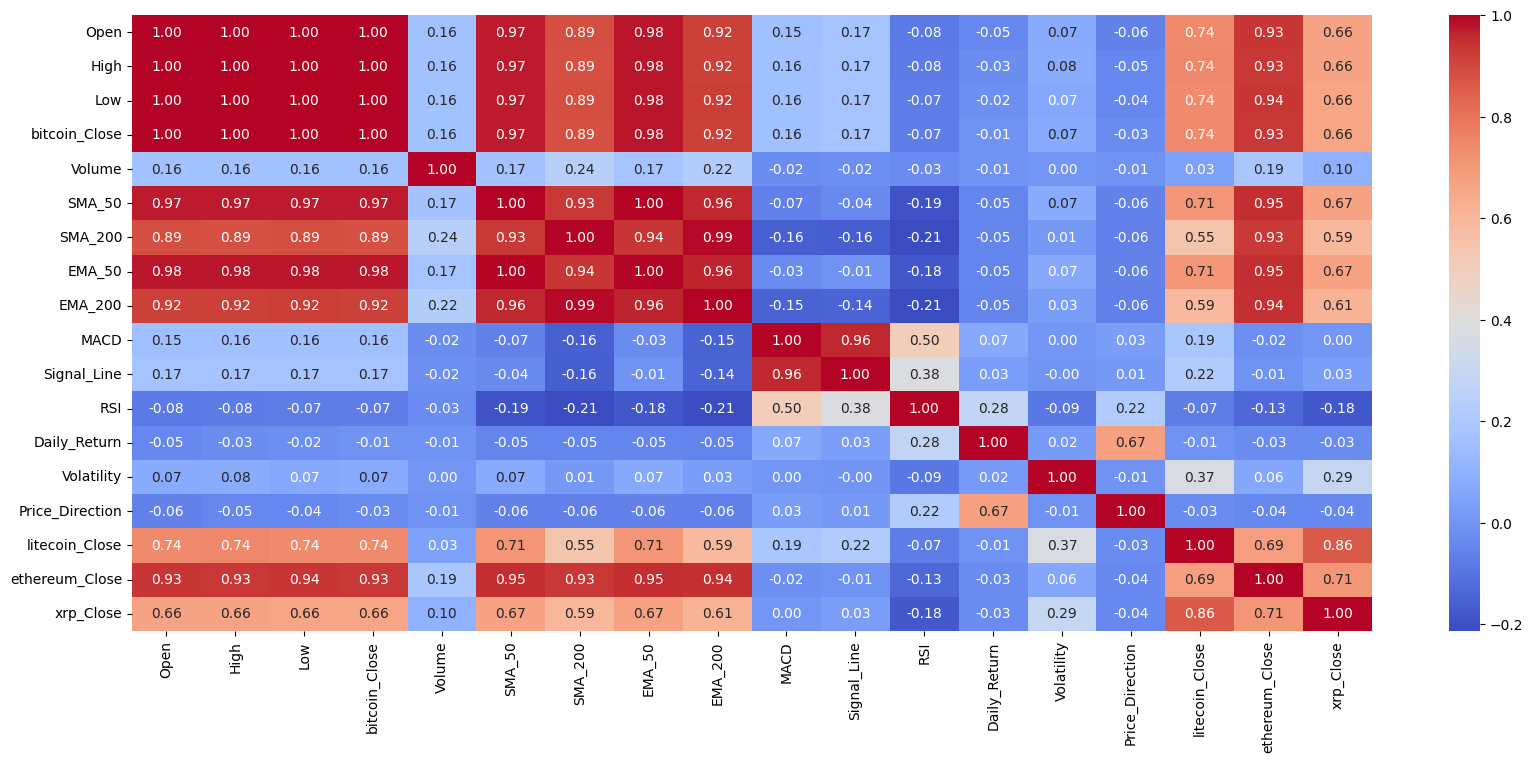

                 bitcoin_Close
bitcoin_Close         1.000000
High                  0.999355
Low                   0.999227
Open                  0.998540
EMA_50                0.979260
SMA_50                0.972914
ethereum_Close        0.933197
EMA_200               0.917142
SMA_200               0.885171
litecoin_Close        0.742338
xrp_Close             0.663275
Signal_Line           0.173883
Volume                0.162915
MACD                  0.159929
Volatility            0.073214
Daily_Return         -0.006410
Price_Direction      -0.032439
RSI                  -0.071419
Important features for period 22191 with popular cyrpocurrency prices:

Cross-validation scores (MSE): [2.81362244e+07 4.72832188e+04 2.65230582e+04 5.22406348e+08
 4.84932091e+06]
Mean cross-validation score (MSE): 111093139.92879029
Feature ranking for bitcoin_Close:
1. feature Low (0.6701481938362122)
2. feature High (0.32886335253715515)
3. feature Daily_Return (0.00022822081518825144)
4. feature Open (0

In [128]:
df_bitcoin_features = df_bitcoin_2_clean.copy()
df_bitcoin_features = df_bitcoin_features.drop(['Currency'], axis=1)
df_bitcoin_features = df_bitcoin_features.rename(columns={'Close': 'bitcoin_Close'})
cryptos_prices_to_copy = ['litecoin', 'ethereum', 'xrp']

# Find the latest starting date among all the cryptocurrencies
latest_start_date = max(df.index.min() for df in [df_bitcoin_features] + [dfs[f'raw_{crypto}_pd'] for crypto in cryptos_prices_to_copy])

# Filter df_bitcoin_features from the latest start date onwards
df_bitcoin_features = df_bitcoin_features[df_bitcoin_features.index >= latest_start_date]

print(f"Important features for period 2{len(df_bitcoin_features)} without popular cyrpocurrency prices:\n")
feature_importance_verifier(df_bitcoin_features.copy(), 'bitcoin_Close')
for crypto in cryptos_prices_to_copy:
    # Filter each crypto DataFrame from the latest start date onwards and add 'Close' price to df_bitcoin_features
    df_bitcoin_features[f'{crypto}_Close'] = dfs[f'raw_{crypto}_pd'].loc[dfs[f'raw_{crypto}_pd'].index >= latest_start_date, 'Close']

print(df_bitcoin_features.count())

# Calculate the correlation matrix
correlation_matrix = df_bitcoin_features.corr()
correlation_with_target = correlation_matrix[['bitcoin_Close']].sort_values(by='bitcoin_Close', ascending=False)
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
print(correlation_with_target)
print(f"Important features for period 2{len(df_bitcoin_features)} with popular cyrpocurrency prices:\n")
feature_importance_verifier(df_bitcoin_features.copy(), 'bitcoin_Close')


7/7 [==============================] - 0s 4ms/step


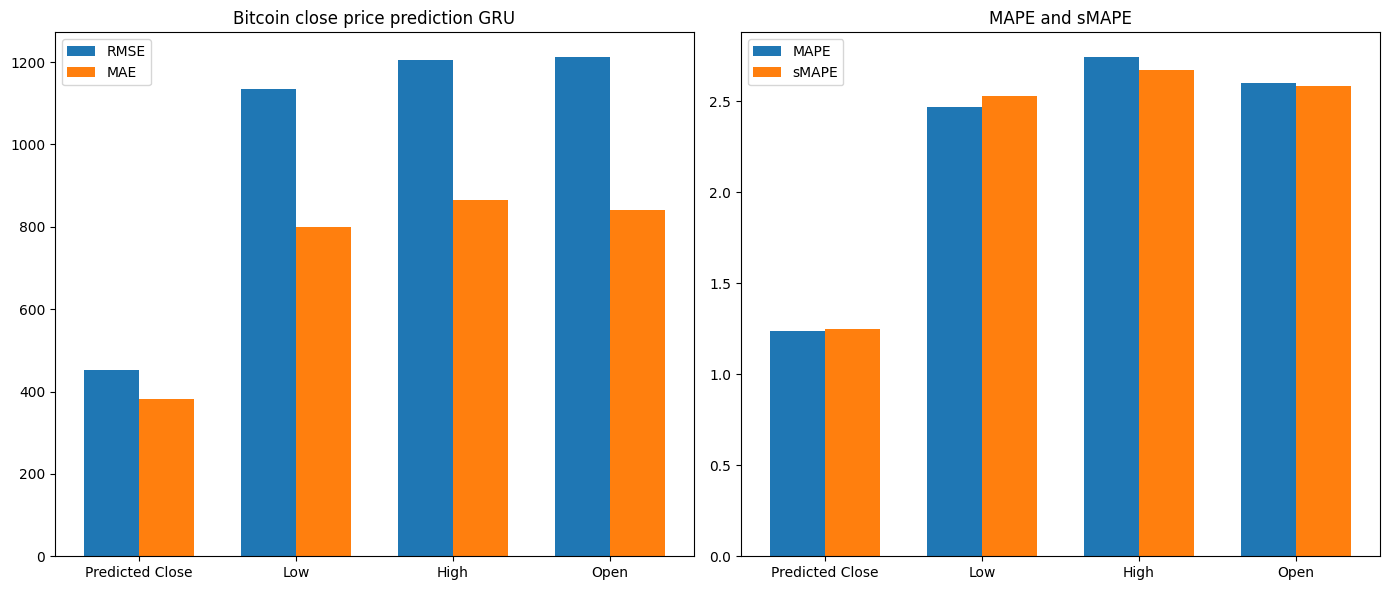

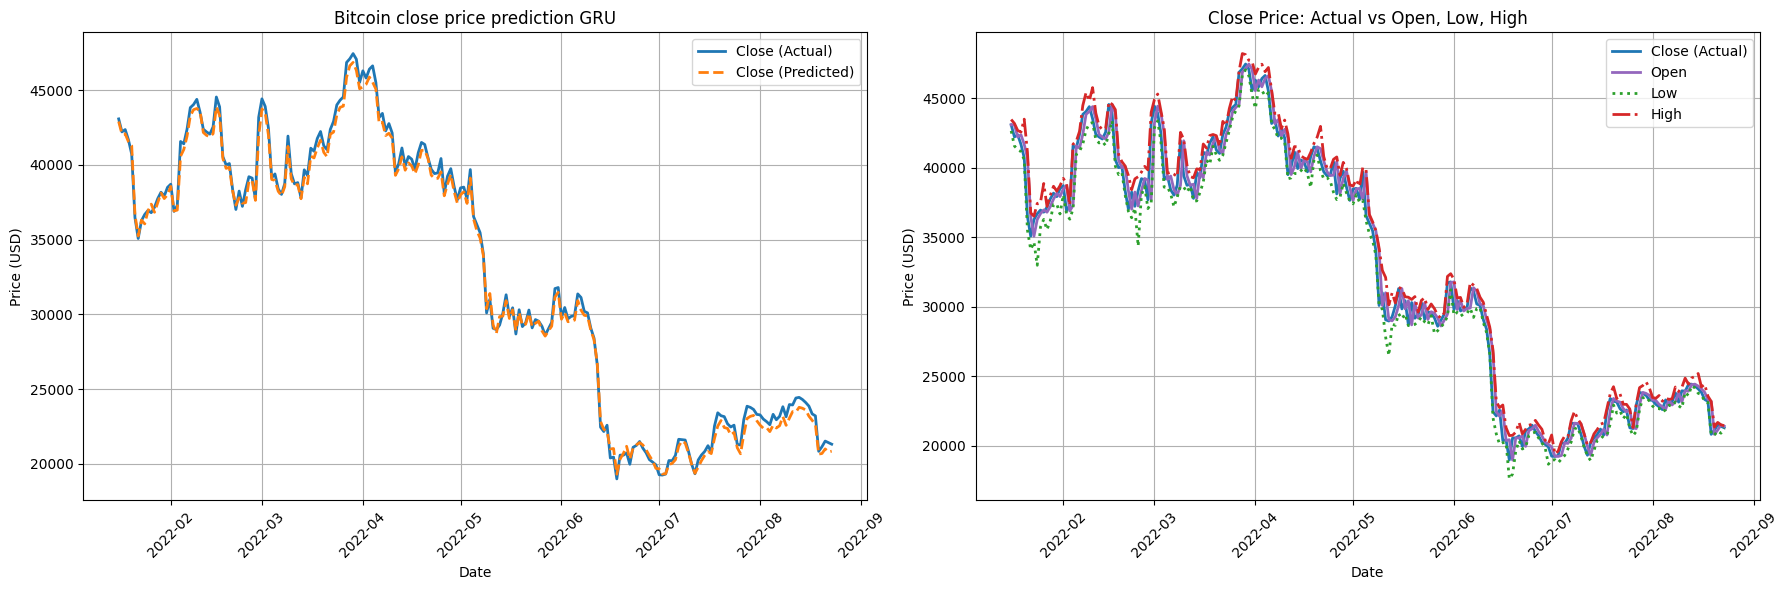

7/7 [==============================] - 0s 4ms/step


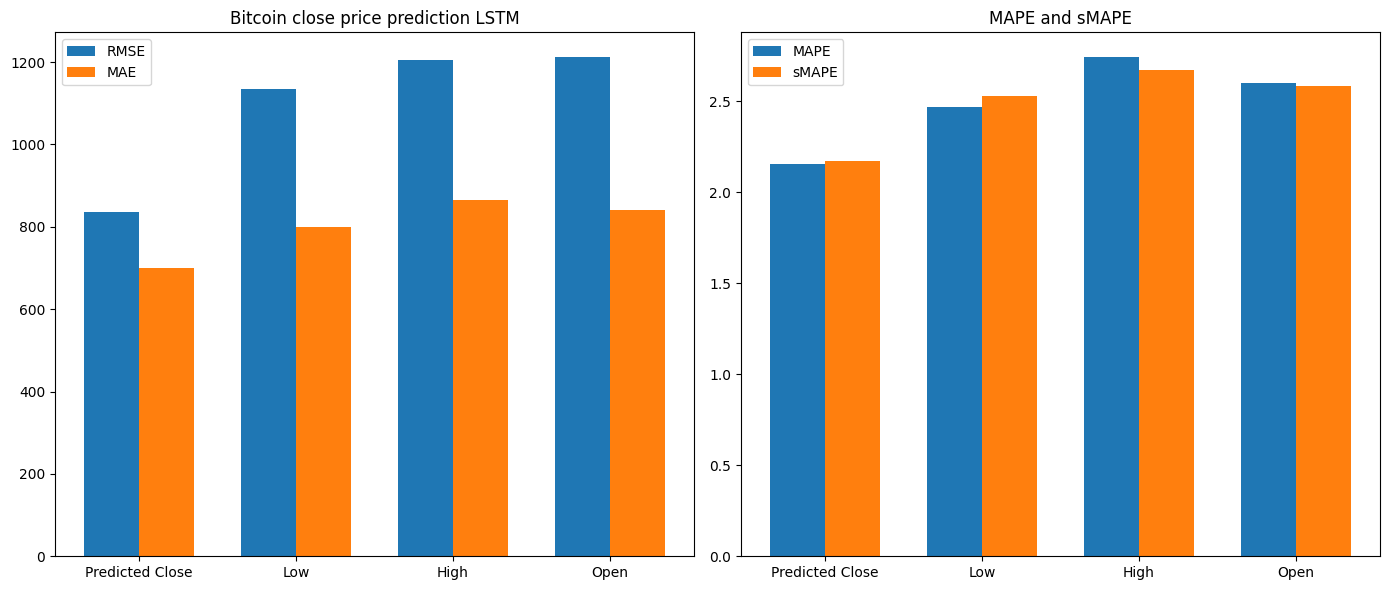

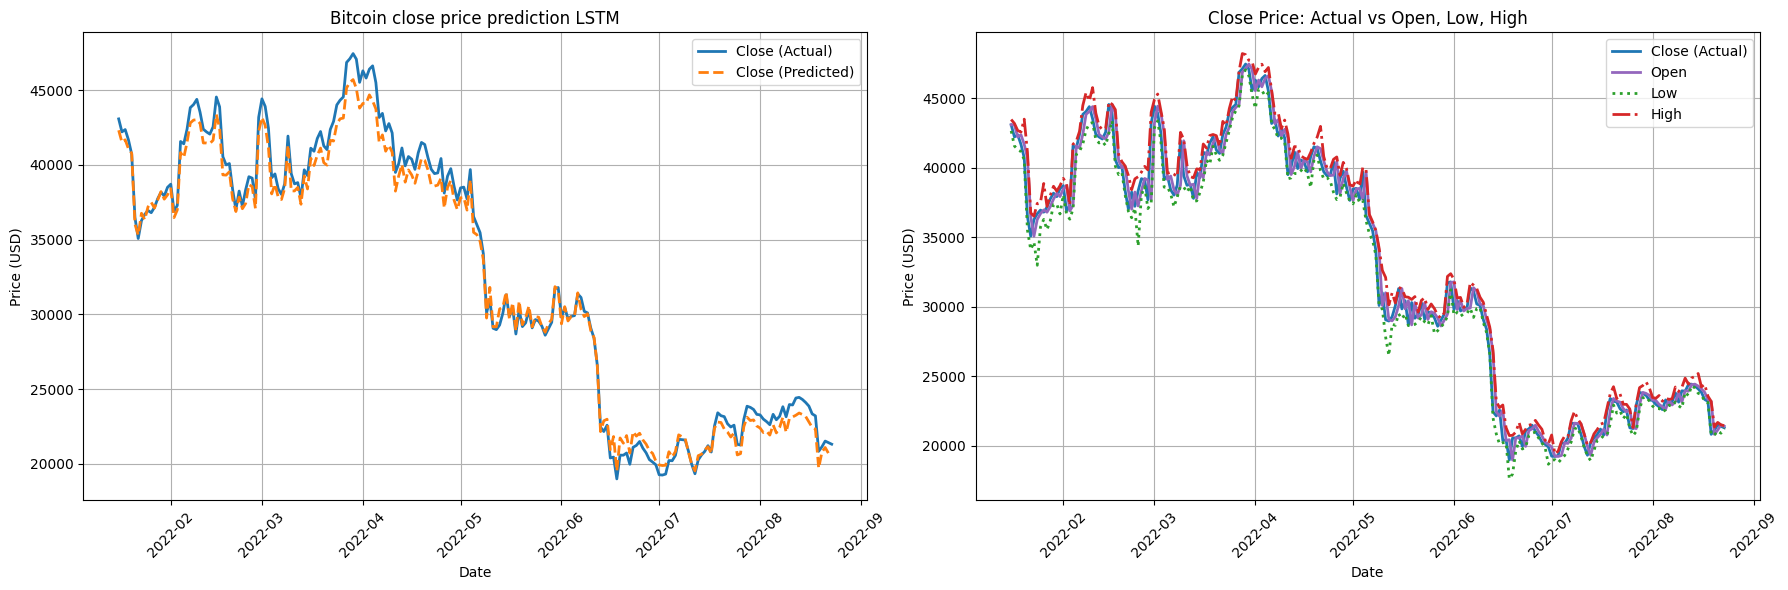

7/7 [==============================] - 1s 4ms/step


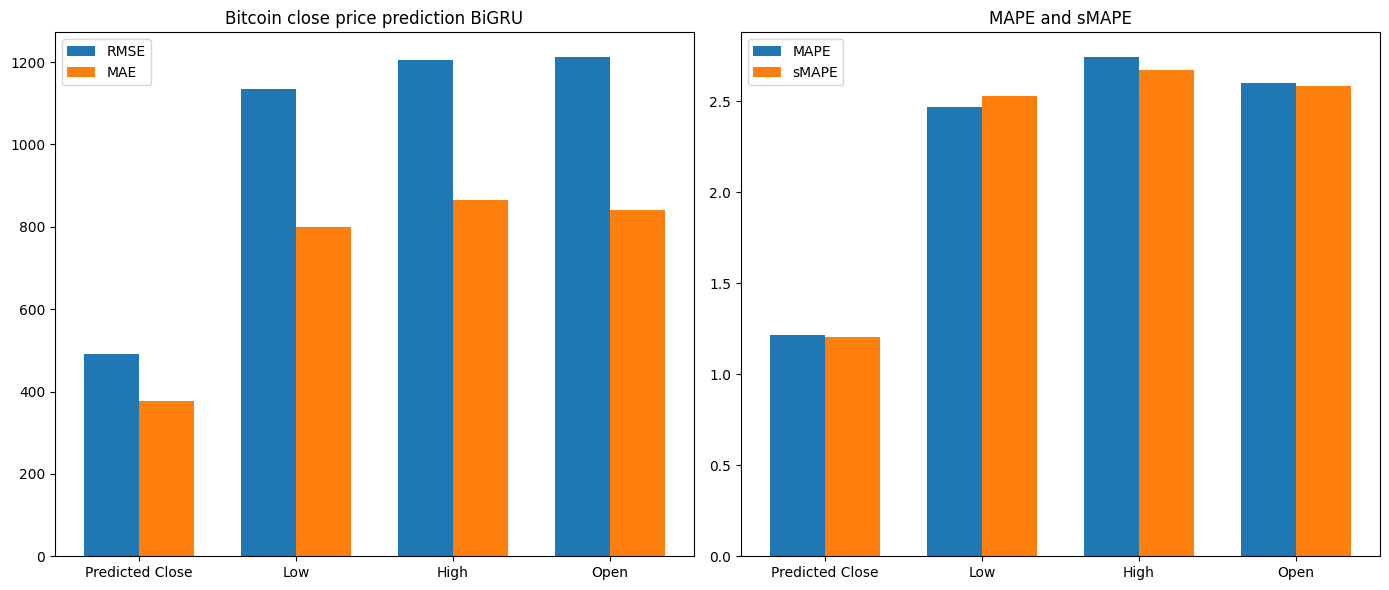

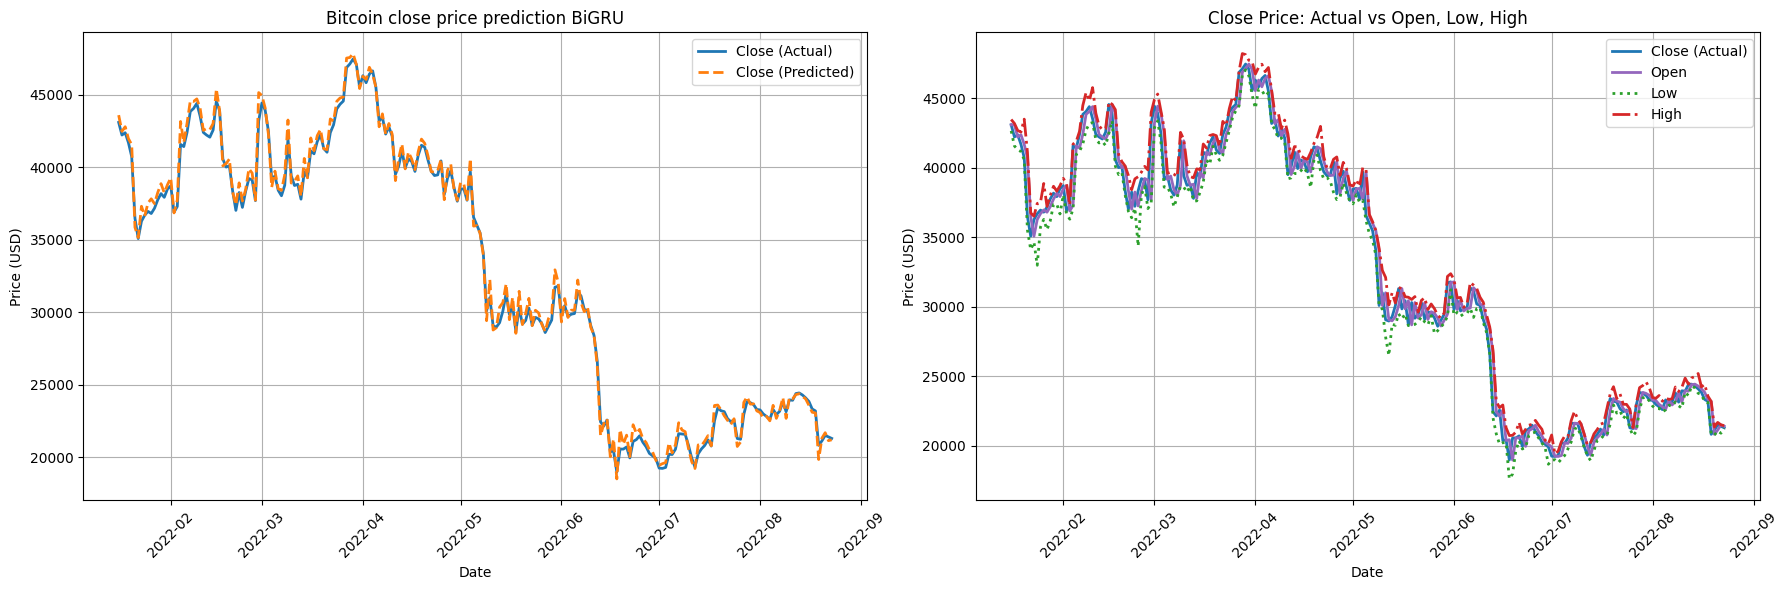

In [129]:
features = ['Low', 'High', 'Open', 'Daily_Return', 'SMA_50', 'ethereum_Close', 'EMA_50', 'litecoin_Close']
target   = 'bitcoin_Close'

X_scaled, y_scaled, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, scaler_X, scaler_y= prepare_data(df_bitcoin_features.copy(), 
                                                                                                                features, 
                                                                                                                target, 
                                                                                                                train_split, 
                                                                                                                validation_split)

model1 = Sequential([
    GRU(512, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.4),
    GRU(480),
    Dropout(0.1),
    Dense(1)
])
model2 = Sequential([
    LSTM(448, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.30),
    LSTM(448),
    Dropout(0.2),
    Dense(1)
])
model3 = Sequential([
    Bidirectional(GRU(448, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.20),
    Bidirectional(GRU(288)),  
    Dropout(0.30),
    Dense(1)
])
models = [model1, model2, model3]
complete_workflow_and_plot(
    df=df_bitcoin_features.copy(),
    models=models,
    features=features,
    target=target,
    train_percent=train_split,
    val_percent=validation_split,
    epochs=50,
    batch_size=32
)

### Models trained on Period 2 (2016-2022)

1. Here we remove the newly added features like the price of ethereum and litecoin to isolate their effects on the model's prediction accuracy.
2. We use the Period 2(2016-2022) to train our models.

7/7 [==============================] - 0s 3ms/step


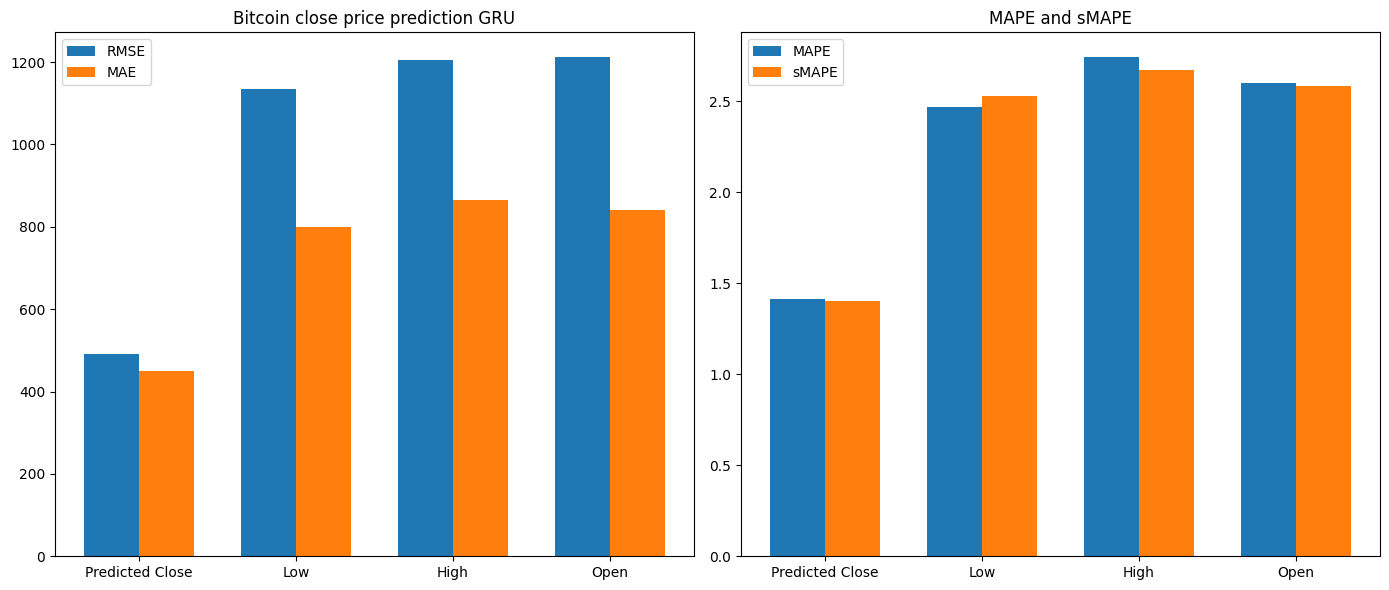

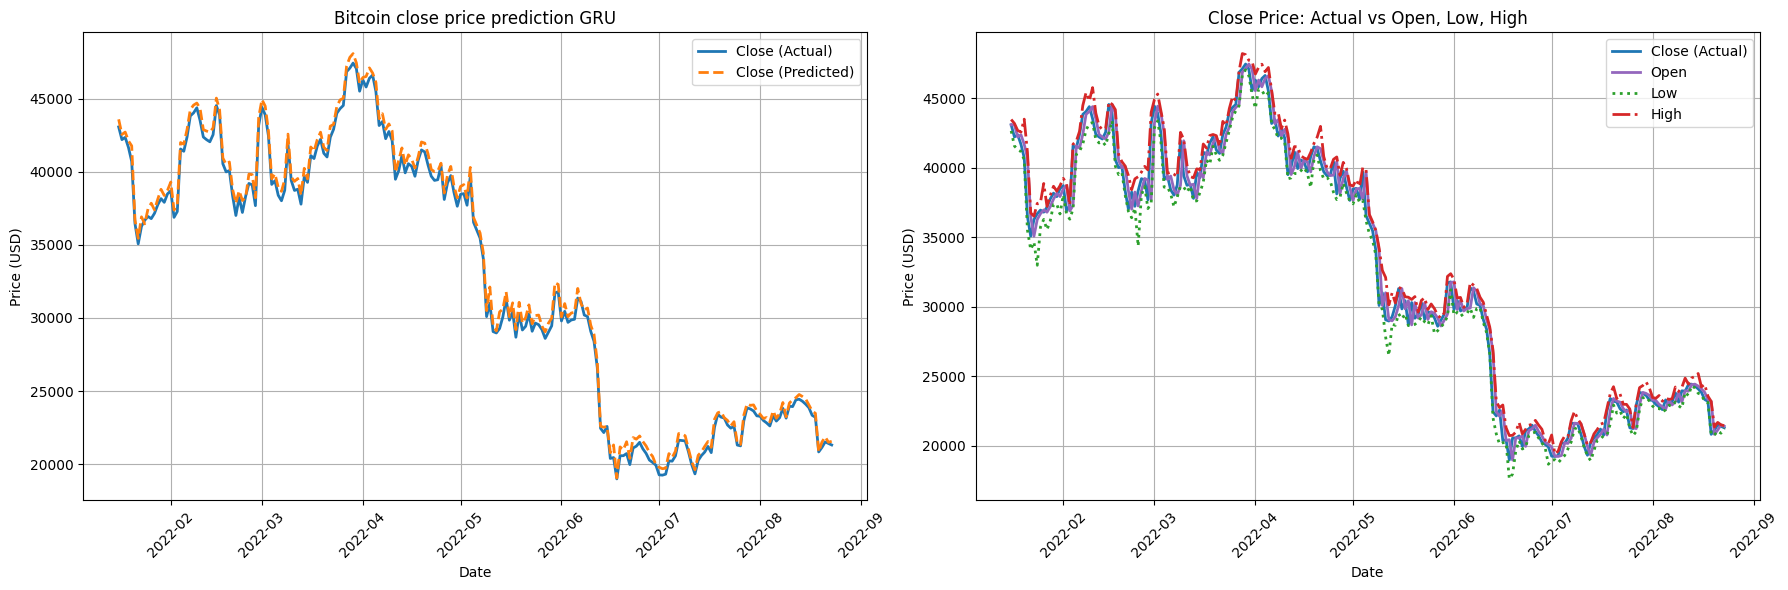

7/7 [==============================] - 0s 2ms/step


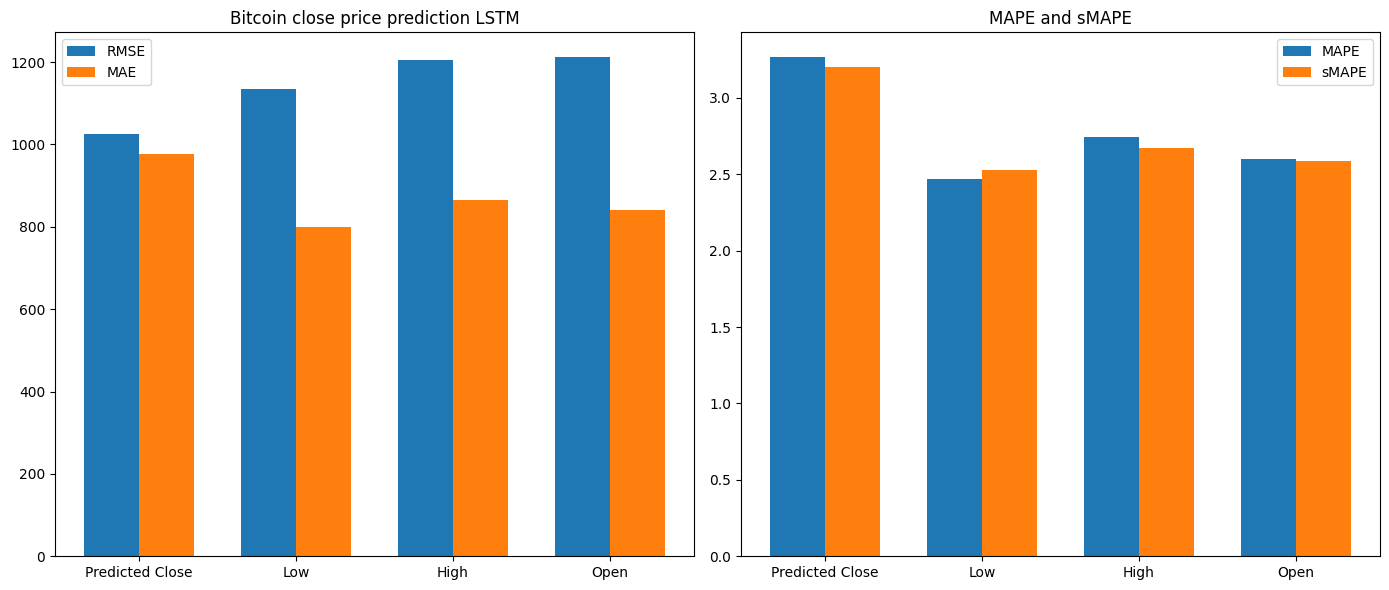

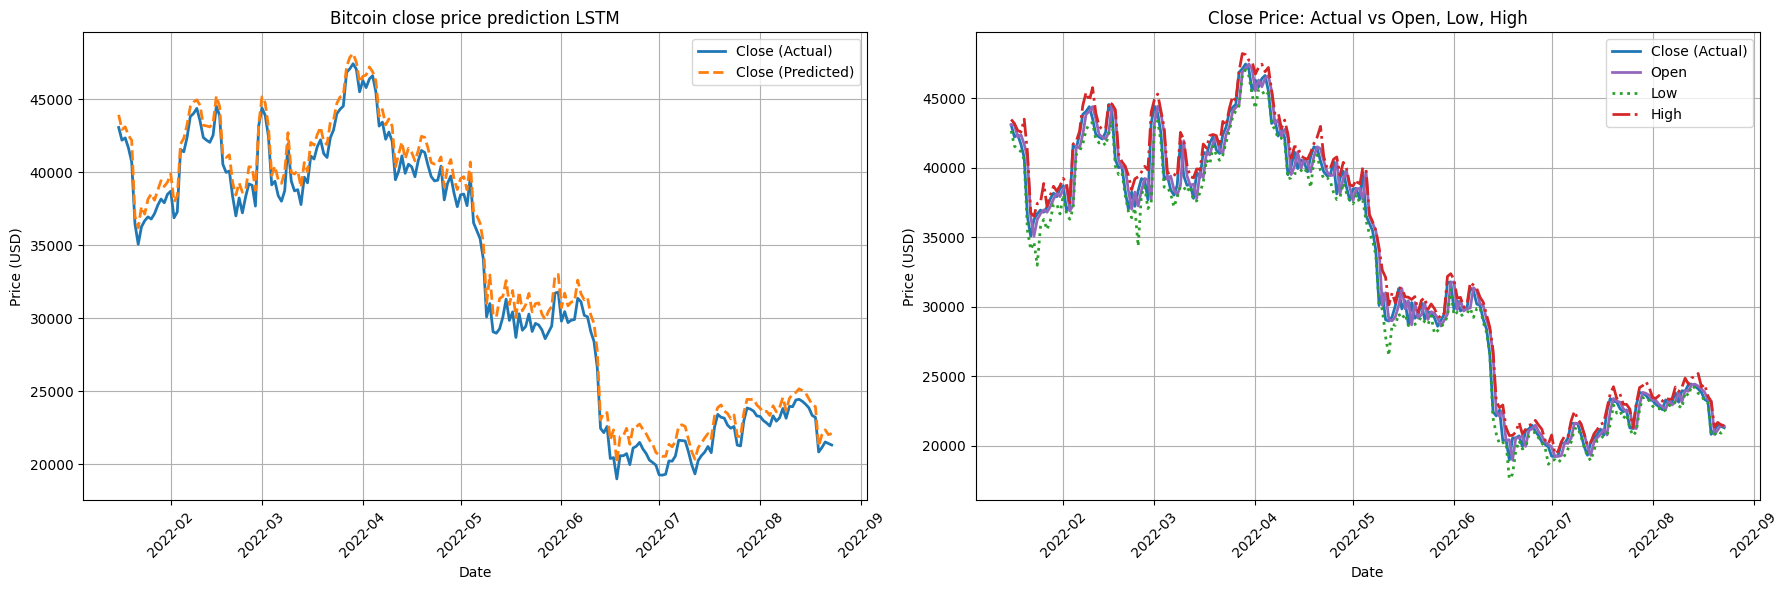

7/7 [==============================] - 1s 3ms/step


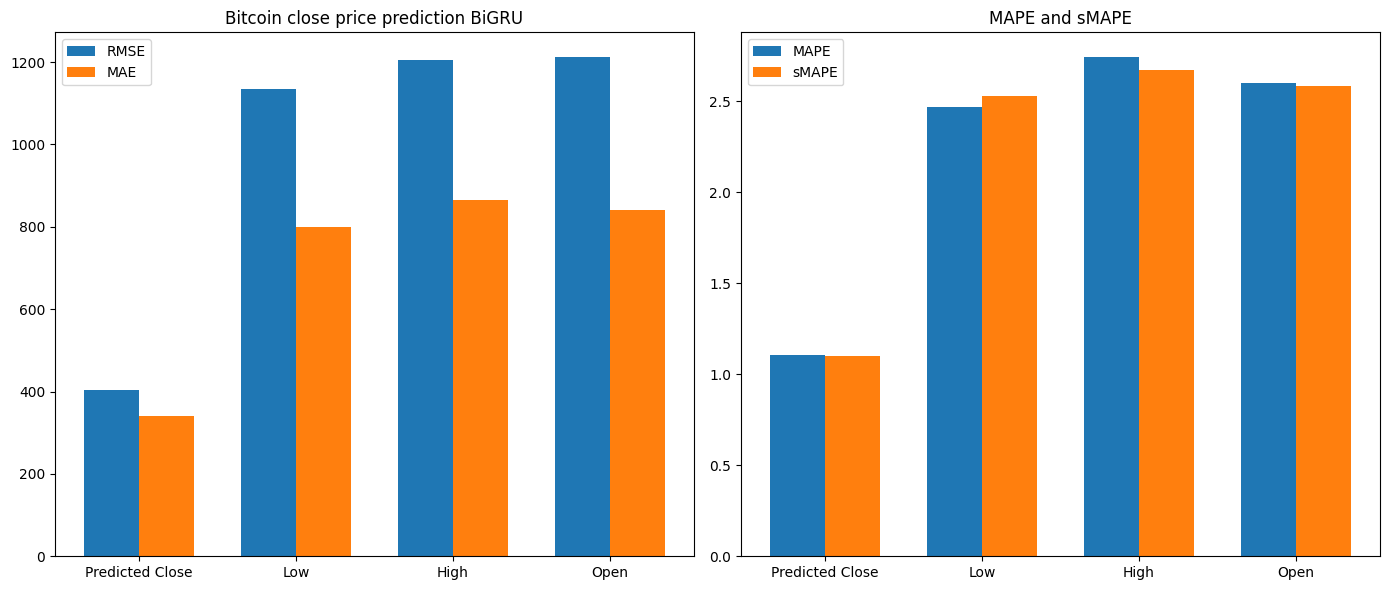

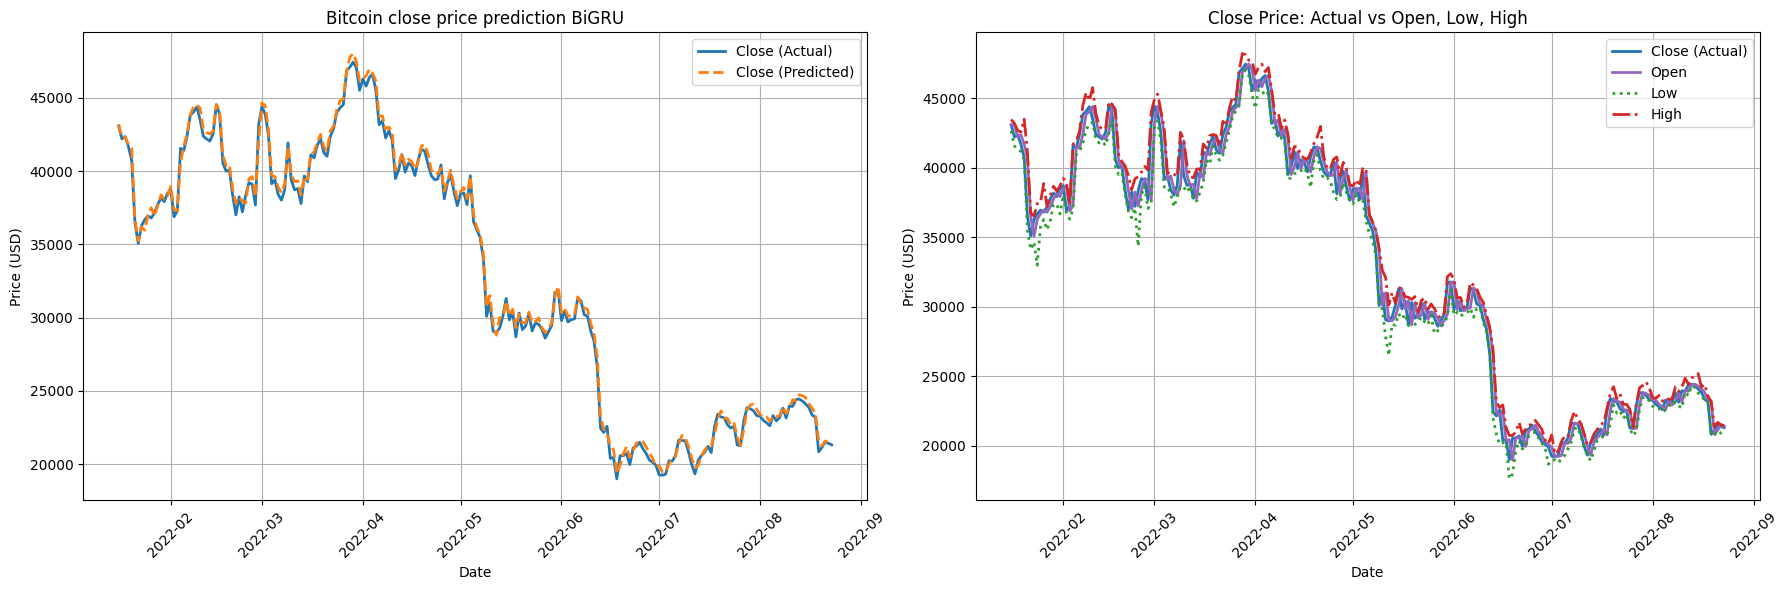

In [130]:
features = ['Low', 'High', 'Open', 'Daily_Return', 'SMA_50', 'EMA_50']
target   = 'bitcoin_Close'

X_scaled, y_scaled, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, scaler_X, scaler_y = prepare_data(df_bitcoin_features.copy(), 
                                                                                                                features, 
                                                                                                                target, 
                                                                                                                train_split, 
                                                                                                                validation_split)

model1 = Sequential([
    GRU(512, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.40),
    GRU(320),
    Dropout(0.00),
    Dense(1)
])
model2 = Sequential([
    LSTM(160, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.10),
    LSTM(288),
    Dropout(0.40),
    Dense(1)
])
model3 = Sequential([
    Bidirectional(GRU(352, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.20),
    Bidirectional(GRU(224)),  
    Dropout(0.30),
    Dense(1)
])
models = [model1, model2, model3]

complete_workflow_and_plot(
    df=df_bitcoin_features.copy(),
    models=models,
    features=features,
    target=target,
    train_percent=train_split,
    val_percent=validation_split,
    epochs=50,
    batch_size=32
)

### Results and Analysis Round up

**Objectives recap:**

1. Use machine/deep learning to predict bitcoin closing price in USD(United States Dollar). 
2. Investigate which features are the most important when it comes to making the above prediction. 

**Results summary:**

1. Our models trained on Period 1(2011-2022) produced slightly better predictions than the Open/Low/High features. GRU model performed the best out of the three in terms of RMSE and MAE. 
2. Prices of other popular cryptocurrency such as Ethereum and Litecoin did not improve model's predictions. However, changing the training and validation data set closer to an event taking place(such as COVID-19 era) did improve performance. For example our models trained for Period(2016-2022) produced the best performance. In period 2 the GRU model performed the best in terms of RMSE/MAE. 
3. The most important features for predicting Bitcoin's closing price were 'Low', 'High', 'Open', 'Daily_Return', 'SMA_50(simple moving average 50 days)', 'EMA_50(exponential moving average 50 days)'.


# ML Challenges and Limitations 

1. Our models were using features such as Open/Low/High prices for Bitcoin to make predictions for the closing price.  In a real life scenario it could be possible that these features are not available to make predictions for the future. Therefore the usage of this model could be limited in an algorithmic trading scenario. 
2. Our models for period 1 (2011-2016) produced only slightly better predictions than the Open/High/Low however the model almost always was able to get the overall trend and price direction of Bitcoin correct. This could be advantageous in a longer trading strategy where predicting the price direction or trend is more paramount than the closing price itself. 
3. When our model was trained on more recent data(period 2), its performance improved significantly. From our project we can conclude that recent data may be more important for training our models for future predictions rather than using the entire historical dataset. 


### Further research and potential improvements

1. We can apply another approach for predicting the Bitcoin price. One popular method is called the "CEEDMAN decomposition". Here we would split our target variable which is the closing price into seperate IMFs and train models to predict these IMFs. Aggregating the IMF predictions would give us our Bitcoin closing price. This method could potentially improve prediction accuracy. 
2. Cryptocurrency prices can be influenced by many other economic factors such as price of oil and gold. A more deeper invesitagation into feature selection could improve our model where we would likely require data from outside the Kaggle website. 
3. Cryptocurrency prices are also in many cases effected by sentiment such as tweets, google searches/trends and online forums. Sentiment analysis could also be an important factor in improving the model's accuracy. Here we would most likely require data outside of the Kaggle website. 

### Sentiment analysis 

This involves analyzing the text of news articles, social media posts, and other textual data to determine the sentiment (positive, negative, neutral) expressed about a particular cryptocurrency. This sentiment can then be used as an input feature to our model. The intuition is that positive news might lead to price increases, while negative news might cause prices to drop. This requires a pipeline that can:

1. Continuously scrape or receive news data from various sources.
2. Preprocess the text data (tokenization, removing stop words, etc.).
3. Analyze sentiment using either pre-trained models or custom models trained on labeled financial news data.


### Online learning

Online learning models are particularly useful in domains where data is continually evolving, where we want our model to adapt to the latest trends without needing a full retraining cycle.

### Example of Monero/XMR displays the limiations of our machine learning model 

At the back end of 2023, the UK government accounced new regulations with regards to cryptocurrency purchase and trading. Subsequently "Bit2me" a major player in the crypto market halted its operations in the UK. At the start of 2024, other major players such as OKX and Binance decided to remove the Monero coin from their platform. Given these advancements, subsequently the price of Monero crashed in February 2024. 

The price of Monero suffered an unprecented decline, something that is impossible to predict using a machine learning model trained on historical data. Therefore sentiment analysis and online learning would be paramount in making these predictions. 

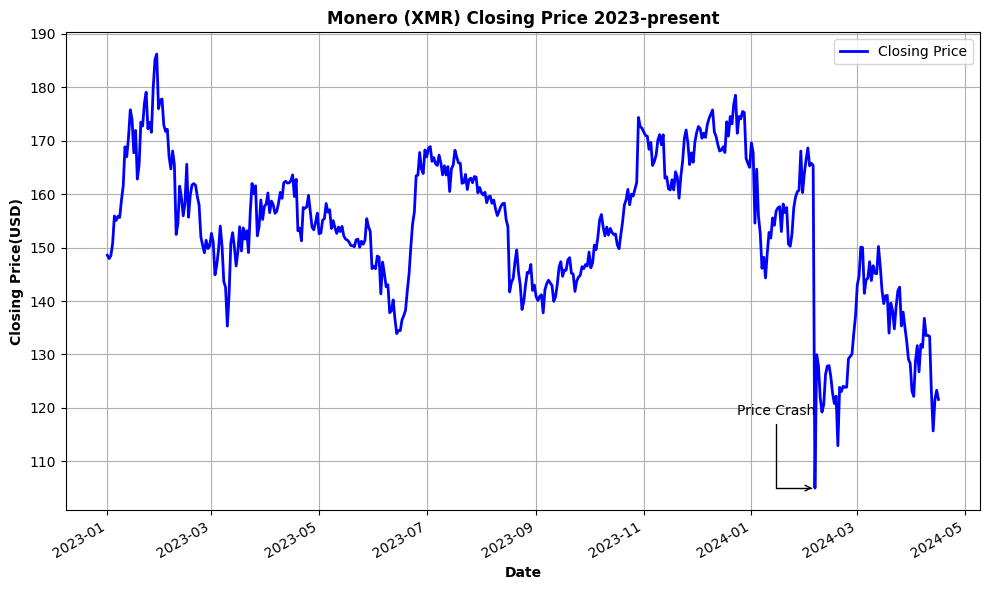

In [131]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetching the data
ticker_symbol = 'XMR-USD'  # Assuming XMR-USD is the ticker symbol
ticker_data = yf.Ticker(ticker_symbol)
ticker_df = ticker_data.history(period='max')

# Filtering the DataFrame for data from 2023 onwards
ticker_df_filtered = ticker_df[ticker_df.index.year >= 2023]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ticker_df_filtered.index, ticker_df_filtered['Close'], label='Closing Price', color='blue', linewidth=2)

# Highlighting the price crash on 6th Feb 2024 with a vertical line
price_crash_date = pd.Timestamp('2024-02-06')

# Adding an annotation with an arrow
y_position = ticker_df_filtered['Close'].min()  # Find the minimum closing price to position the annotation at the bottom
plt.annotate('Price Crash', xy=(price_crash_date, y_position), xytext=(price_crash_date, y_position * 1.15),
             arrowprops=dict(facecolor='red', arrowstyle="->", connectionstyle="angle,angleA=-90,angleB=180,rad=0"),
             horizontalalignment='right', verticalalignment='top')

# Adding title and labels
plt.title('Monero (XMR) Closing Price 2023-present', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Closing Price(USD)', fontweight='bold')
plt.gcf().autofmt_xdate()  # Improve date labels readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()